# Исследование объявлений о продаже квартир

0.1 **Описание проекта:**

Перед нами данные сервиса Яндекс.Недвижимость, а именно архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель:** Нужно научиться определять рыночную стоимость объектов недвижимости. 

**Задача:** установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 



0.2 **Описание данных:**

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь (гостиная, спальни) в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении


0.3. Задачи(подробно):

**Шаг 1. Обзор данных:**

1. Просмотр общей информации

**Шаг 2. Предобработка данных**
1. Определение и изучение пропущенных значений.
2. Заполнение пропусков, где это возможно. Объяснение, почему заполняю/не заполняю пропуски.
3. Привести данные к нужным типам (с пояснением выбора типа).

**Шаг 3. Добавить в таблицу:**
1. Цену квадратного метра.
2. День недели, месяц и год публикации объявления.
3. Этаж квартиры; варианты — первый, последний, другой.
4. Соотношение жилой и общей площади, а также отношение площади кухни к общей.

**Шаг 4. Исследовательский анализ данных:**	
1. Изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
2. Изучаем время продажи квартиры. Строим гистограмму. Считаем среднее и медиану. Описываем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
3. Убираем редкие и выбивающиеся значения. Описываем, какие особенности обнаружили.
4. Какие факторы больше всего влияют на стоимость квартиры? Изучаем, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучаем зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучаем зависимость от даты размещения: дня недели, месяца и года.
5. Выбираем 10 населённых пунктов с наибольшим числом объявлений. Считаем среднюю цену квадратного метра в этих населённых пунктах. Выделяем населённые пункты с самой высокой и низкой стоимостью жилья.
6. Изучаем предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделяем квартиры в Санкт-Петербурге ('locality_name'). Задача — выяснить, какая область входит в центр. Создаем столбец с расстоянием до центра в километрах: округляем до целых значений. После этого считаем среднюю цену для каждого километра. Строим график: он должен показывать, как цена зависит от удалённости от центра. Определяем границу, где график сильно меняется — это и будет центральная зона.
7. Выделяем сегмент квартир в центре. Анализируем эту территорию и изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Также выделяем факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Делаем выводы. Отличаются ли они от общих выводов по всему городу?

**Шаг 5. Результат**
1. Пишем вывод

### Шаг 1: Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime  # для получения дня недели из даты
pd.options.mode.chained_assignment = None  # отключаем предупреждения Pandas

In [2]:
test = [1, 2, 3, 4]
intervals = pd.cut(test, 2, include_lowest=True, right=False)

In [3]:
intervals

[[1.0, 2.5), [1.0, 2.5), [2.5, 4.003), [2.5, 4.003)]
Categories (2, interval[float64]): [[1.0, 2.5) < [2.5, 4.003)]

Знакомимся с файлом. Выгрузим данные в csv-файл, чтоб была возможность работать с ними в дальнейшем:

In [4]:
try:
    data = pd.read_csv('C:/Python_files/project3/real_estate_data.csv', sep='\t') 
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [5]:
from IPython.display import HTML
import base64


def create_download_link(data, title = "Download CSV file", filename = "real_estate_data.csv"):  
    csv = data.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="real_estate_data:text/csv;charset=utf-8;base64,{payload}">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(data)

Смотрим общую информацию о данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

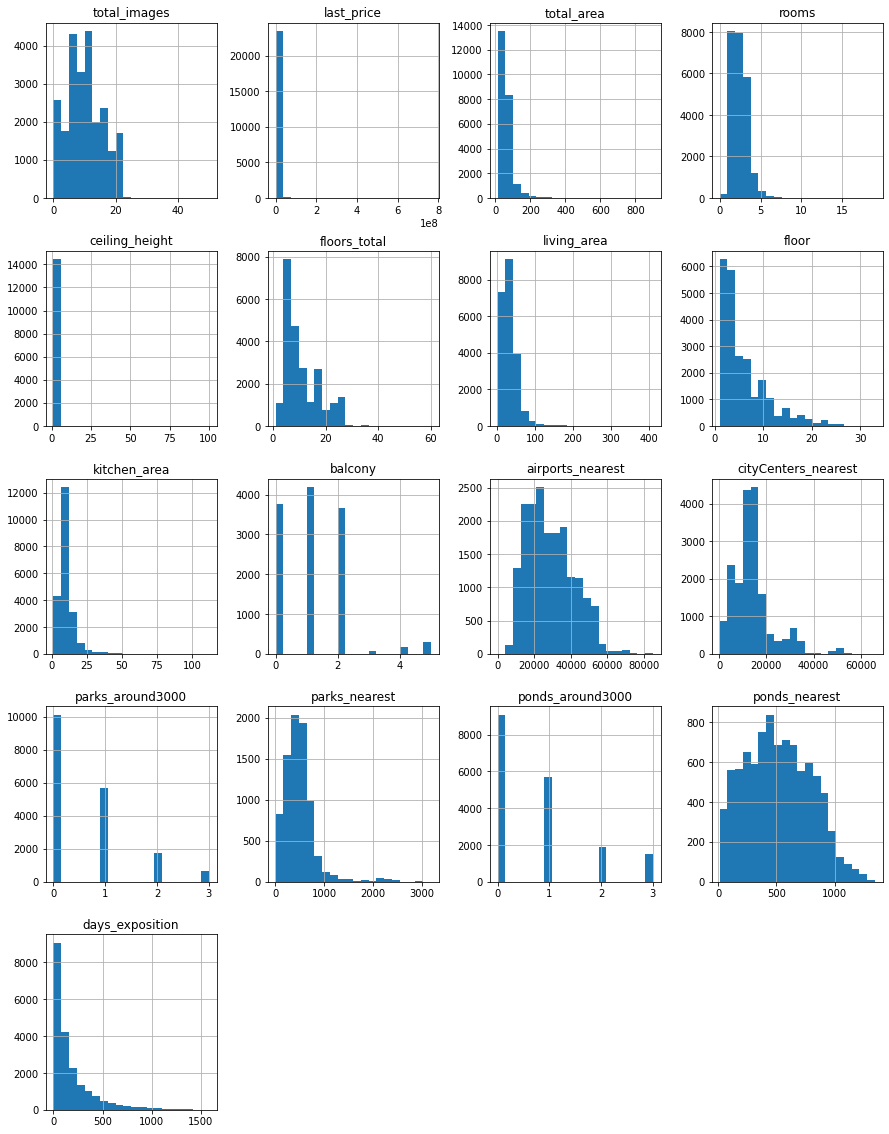

In [6]:
data.info()
display(data.head())
data.hist(bins=20, figsize=(15, 20))
plt.show();

In [7]:
data.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445      4.885249      5.905438      1.071300   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      1.000000   
75%       16.000000     42.300000      8.000000     12.000000      2.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      18157.000000         18180.000000      18181.000000    8079.000000   
mean       28793.672193         14191.277833          0.611408     490.804555   
std        12630.880622          8608.386210          0.802074     342.317995   
min            0.000000           181.000000          0.000000       1.000000   
25%        18585.000000          9238.000000          0.000000     288.000000   
50%        26726.000000         13098.500000          0.000000     455.000000   
75%        37273.000000         16293.000000          1.000000     612.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition  
count      18181.000000    9110.000000     20518.000000  
mean           0.770255     517.980900       180.888634  
std            0.938346     277.720643       219.727988  
min            0.000000      13.000000         1.000000  
25%            0.000000     294.000000        45.000000  
50%            1.000000     502.000000        95.000000  
75%            1.000000     729.000000       232.000000  
max            3.000000    1344.000000      1580.000000

На первый взгляд из обзора данных ясно, что в датасете присутствуют пропущенные значения, указан некорректный тип данных для некоторых столбцов. В целом, данные выглядят нормально, однако, есть разного рода аномалии: 100-метровый потолок, 19-комнатные квартиры, 900 метровые площади...  Необходимо провести предобработку данных.

### Шаг 2: Предобработка данных

**2.1 Устранение неявных и явных дубликатов**

Поработаем с данными о названии населенного пункта `locality_name`. Посмотрим на уникальные значения столбца.  

In [8]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Много неявных дубликатов. Устраним их:

In [9]:
#уберем потворяющиеся значения в названии населенного пункта 
data['locality_name'] = data['locality_name'].str.replace('ё','е')

word_list = ['поселок городского типа', 'поселок Мурино', 'деревня Кудрово', 'Коммунары',\
             'поселок Рябово' ,'поселок станции Вещево','поселок станции Приветнинское',\
             'коттеджный поселок Лесное', 'поселок при железнодорожной станции',\
            'садоводческое некоммерческое товарищество']
name = ['городской посёлок', 'Мурино', 'Кудрово', 'Коммунар', 'поселок городского типа Рябово',\
        'поселок при железнодорожной станции Вещево',\
        'поселок при железнодорожной станции Приветнинское', 'поселок Лесное', 'поселок станции',\
       'cадовое товарищество']
 
for word in word_list:
    data['locality_name'] = data['locality_name'].replace(word_list, name, regex=True)  
 

list(data['locality_name'].sort_values(ascending=False).unique()) 

['село Шум',
 'село Старая Ладога',
 'село Русско-Высоцкое',
 'село Рождествено',
 'село Путилово',
 'село Паша',
 'село Павлово',
 'село Никольское',
 'село Копорье',
 'садовое товарищество Садко',
 'садовое товарищество Рахья',
 'садовое товарищество Приладожский',
 'садовое товарищество Новая Ропша',
 'поселок станции Свирь',
 'поселок станции Приветнинское',
 'поселок станции Лужайка',
 'поселок станции Корнево',
 'поселок станции Громово',
 'поселок станции Вещево',
 'поселок при железнодорожной станции Приветнинское',
 'поселок при железнодорожной станции Вещево',
 'поселок Щеглово',
 'поселок Шушары',
 'поселок Шугозеро',
 'поселок Цвылево',
 'поселок Цвелодубово',
 'поселок Форт Красная Горка',
 'поселок Ушаки',
 'поселок Усть-Луга',
 'поселок Усть-Ижора',
 'поселок Углово',
 'поселок Торфяное',
 'поселок Торковичи',
 'поселок Тесово-4',
 'поселок Терволово',
 'поселок Тельмана',
 'поселок Суходолье',
 'поселок Сумино',
 'поселок Суйда',
 'поселок Стрельна',
 'поселок Стеклянны

In [10]:
#смотрим количество уникальных значений в столбце

data['locality_name'].value_counts()

Санкт-Петербург                  15721
Мурино                             590
Кудрово                            472
поселок Шушары                     440
Всеволожск                         398
                                 ...  
деревня Пчева                        1
городской посёлок Кондратьево        1
деревня Старое Хинколово             1
деревня Щеглово                      1
деревня Малая Романовка              1
Name: locality_name, Length: 326, dtype: int64

В архиве присутствуют объявления из 326 населенных пунктов! Посмотрим, есть ли явные дубликаты в датафрейме:

In [11]:
print('Количество явных дубликатов в датафрейме:', data.duplicated().sum())

Количество явных дубликатов в датафрейме: 0


**2.2. Поиск и обработка пропусков**

Найдём пропуски:

In [12]:
display(data.isna().sum().to_frame())
#data.isna().sum().plot(kind='bar')

0
total_images              0
last_price                0
total_area                0
first_day_exposition      0
rooms                     0
ceiling_height         9195
floors_total             86
living_area            1903
floor                     0
is_apartment          20924
studio                    0
open_plan                 0
kitchen_area           2278
balcony               11519
locality_name            49
airports_nearest       5542
cityCenters_nearest    5519
parks_around3000       5518
parks_nearest         15620
ponds_around3000       5518
ponds_nearest         14589
days_exposition        3181

Посмотрим на их процентное соотношение:

In [13]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

Как много пропусков... Выведем информацию о NaN по каждому из столбцов (доля NaN в каждом столбце относительно общего количества строк):

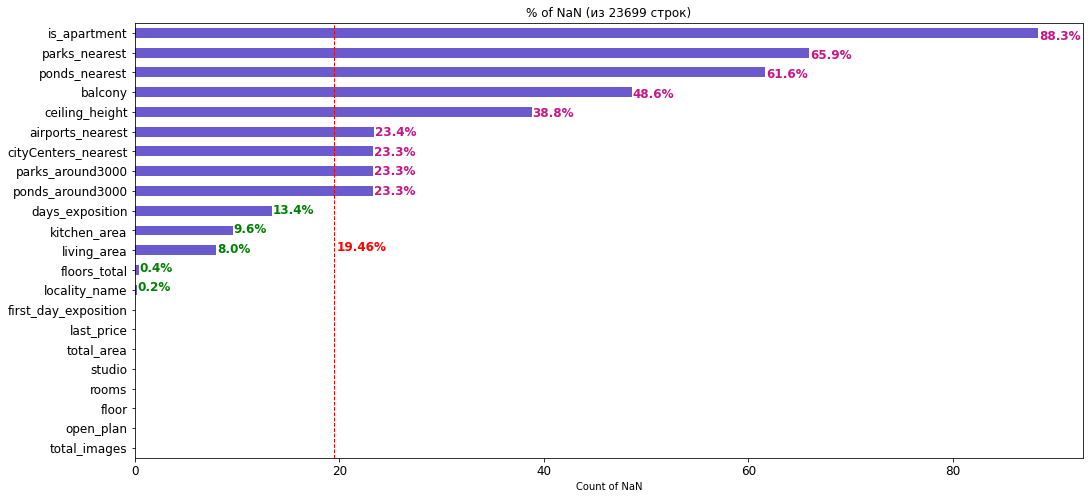

In [14]:
def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isna().sum()/len(df)*100).sort_values().round(1)
    threshold = percent_of_nulls.mean()
    # above_threshold = np.maximum(percent_of_nulls - threshold, 0)
    # below_threshold = np.minimum(percent_of_nulls, threshold)
    ax = percent_of_nulls.plot(kind='barh', figsize=(17, 8), title='% of NaN (из 23699 строк)', 
                               color='slateblue', legend=False, fontsize=12)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'green'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'mediumvioletred'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, 10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='blue', linestyle='--')
        ax.text(threshold+0.3, 10, '{0:.2%}'.format(threshold/100), color='blue', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, 10, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    return ax, threshold

plot, threshold = percent_hbar(data)

На графике отображен средний процент содержания NaN в столбце - равен почти `19,46%`. Этот порог преодолели 9 из 22 столбцов. У 5 столбцов доля пропущенных значений крайне велика. 

Мои предположения: 
1. У столбцов, связанных с расстоянием до аэропорта, до центра города и с числом водоёмов и парков доля пропущенных значений примерно одинаковая. Предположительно, они не были заполнены системой, так как это картографические данные. То же самое касается и пропусков в столбцах с расстоянием до ближайшего парка и водоёма.
2. `is_apartment` - поскольку здесь булев массив, то должен был быть тип данных `bool`, а выставлен `object`. Скорее всего, где апартаментов нет или нет данных об этом, автор объявления писал "0" или "Нет", т.е. это не апартаменты, а "1" или "Да". Поскольку тип данных указан некорректно, то и данные отобразились некорректно. Для устранения пропусков необходимо изменить тип данных, однако, перед этим необходимо посмотреть каково соотношение `True` и `False`.
3. `parks_nearest`, `ponds_nearest` - вполне возможно, что данные просто не были выгружены системой. Беря в расчет то, что это далеко не самые важные параметры, и отсутствие возможности проставить какое-либо адекватные расстояние, которое не испортит статистику по уже присутствующим данным по этим столбцам, предлагаю здесь не трогать пропуски, учитывая, что есть достаточное количество строк, где данные присутствуют, и по ним можно сделать срез и заметить определенные тенденции.
4. `balcony` - вПропуски в данных о числе балконов обусловлены тем,что в представленных квартирах их нет, а если их нет - нет надобности указывать в объявлении. Необходио пропуски в данном столбце заменить "0";
5. `ceiling_height` - довольно важная информация, но она отсуствует. Предполагаю, что некоторые не считают это обязательным для заполнения пунктом и поэтому не предприняли никаких действий для того, чтоб узнать высоту своих потолков. К тому же в данных, есть аномалии. Необходимо посмотреть на данные подробнее.
6. `days_exposition` - довольно важный параметр. Информация может отсутствовать, например, по причине того, что объявление может быть действительно в настоящий момент времени, неизвестна дата окончания нахождения объявления на сайте, или сделка была совершена, но объявление ещё не в архиве. Предлагаю не трогать данный столбец, так как он не является самым важным в нашем исследовании. 
7. `floors_total` - данные могут отсутствать по причине необязательности заполнения этих столбцов. Учитывая, что вариативность этажности в зданий довольно сильно коррелирует с местонахождением здания (например, в центре города здания сильно ниже, чем на окраине города из-за исторического центра). Необходимо заполнить данные в соответствии с корреляцией. 
8. `locality_name` - выглядит довольно странно, когда не указывают населенный пункт. Возможно, что данные не заполнены специально для привлечения внимания покупателей, если, например, квартира находится на окраине города и продаётся долго или неудачно. Тем не менее, заполним данные только по тем строкам, где указано расстояние до центра. От центра до окраин города в среднем 15 км расстояния, те квартиры, которые находятся в пределах 15 км от центра, получат объявления по запросу "Санкт-Петербург".

Что касается групп пропусков в `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`:

1. `airports_nearest`, `cityCenters_nearest` - это картографические данные, следовательно, их рассчитывала система. Они могут отустствовать по причине того, что относительно конкретно взятого населенного пункта/точки искались расстояние в определенном радиусе. Если в пределах этого радиуса ни аэропорта, ни парков не было, то и указать в этом столбце системе было нечего. Как бы то ни было, где указаны названия населенных пунктов (кроме Санкт-Петербурга, т.к. это крупный город), найдем их координаты и посчитаем расстояние между ними и аэропортом и центром крупного города, если это возможно. 
2. `parks_around3000`, `ponds_around3000` аналогично как и `parks_nearest`, и `ponds_nearest` - данные просто не были заполнены системой. Однако, могут быть выбросы, например, нулевые значения в количестве парков при указанном расстоянии до ближайшего парка в пределах 3 км.

**2.3. Заполнение пропусков**

1. `balcony` - заполняем пропуски нулями и проверим

In [15]:
data['balcony'] = data['balcony'].fillna(0)

#data.sort_values(by='balcony', ascending=False).tail()
print('Количество NaN в столбце balcony:', data['balcony'].isna().sum())

Количество NaN в столбце balcony: 0


2. `is_apartment` 

In [16]:
print('Количество NaN в столбце is_apartment:', data['is_apartment'].isna().sum())
data['is_apartment'].value_counts().to_frame()

Количество NaN в столбце is_apartment: 20924


is_apartment
False          2725
True             50

Заполнять пропуски значением `False` не будем, т.к. если мы это сделаем, то мы скажем, что во всём датафрейме (>20000 строк) всего 50 апартаментов, что не может соотноситься с реальностью.

3. `parks_around3000`, `ponds_around3000`, `parks_nearest`,`ponds_nearest`, `airports_nearest`, `cityCenters_nearest`

In [17]:
print('Количество NaN по parks_nearest:', data['parks_nearest'].isna().sum())
print('Количество NaN по ponds_nearest:', data['ponds_nearest'].isna().sum())
print()
print('Количество NaN по airports_nearest:', data['airports_nearest'].isna().sum())
print('Количество NaN по cityCenters_nearest:', data['cityCenters_nearest'].isna().sum())
print()
print('Количество NaN по parks_around3000:', data['parks_around3000'].isna().sum())
print('Количество NaN по ponds_around3000:', data['ponds_around3000'].isna().sum())

Количество NaN по parks_nearest: 15620
Количество NaN по ponds_nearest: 14589

Количество NaN по airports_nearest: 5542
Количество NaN по cityCenters_nearest: 5519

Количество NaN по parks_around3000: 5518
Количество NaN по ponds_around3000: 5518


In [18]:
#проверим, есть ли связь между пропусками в 4-х столбцах
data.loc[(data['parks_around3000'].isna()) & (data['ponds_around3000'].isna()) & (data['airports_nearest'].isna()) & (data['cityCenters_nearest'].isna())]

total_images  last_price  total_area first_day_exposition  rooms  \
5                10   2890000.0       30.40  2018-09-10T00:00:00      1   
8                20   2900000.0       33.16  2018-05-23T00:00:00      1   
12               10   3890000.0       54.00  2016-06-30T00:00:00      2   
22               20   5000000.0       58.00  2017-04-24T00:00:00      2   
30               12   2200000.0       32.80  2018-02-19T00:00:00      1   
...             ...         ...         ...                  ...    ...   
23683            16   2100000.0       62.80  2018-09-18T00:00:00      4   
23692             2   1350000.0       30.00  2017-07-07T00:00:00      1   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
5                 NaN          12.0        14.40      5          NaN  ...   
8                 NaN          27.0        15.43     26          NaN  ...   
12                NaN           5.0        30.00      5          NaN  ...   
22               2.75          25.0        30.00     15          NaN  ...   
30                NaN           9.0          NaN      2          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
23683            2.50           5.0        45.50      3          NaN  ...   
23692             NaN           5.0        17.50      4          NaN  ...   
23695             NaN           5.0        38.00      4          NaN  ...   
23696             NaN           3.0        29.70      1          NaN  ...   
23698            2.50           5.0        12.30      1          NaN  ...   

       kitchen_area  balcony              locality_name  airports_nearest  \
5              9.10      0.0  городской поселок Янино-1               NaN   
8              8.81      0.0                     Мурино               NaN   
12             9.00      0.0                  Сертолово               NaN   
22            11.00      2.0                    Кудрово               NaN   
30              NaN      0.0                   Коммунар               NaN   
...             ...      ...                        ...               ...   
23683          5.50      0.0       поселок Дзержинского               NaN   
23692          6.00      0.0                     Тихвин               NaN   
23695          8.50      0.0                      Тосно               NaN   
23696           NaN      0.0           село Рождествено               NaN   
23698          9.00      0.0        поселок Новый Учхоз               NaN   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
5                     NaN               NaN            NaN               NaN   
8                     NaN               NaN            NaN               NaN   
12                    NaN               NaN            NaN               NaN   
22                    NaN               NaN            NaN               NaN   
30                    NaN               NaN            NaN               NaN   
...                   ...               ...            ...               ...   
23683                 NaN               NaN            NaN               NaN   
23692                 NaN               NaN            NaN               NaN   
23695                 NaN               NaN            NaN               NaN   
23696                 NaN               NaN            NaN               NaN   
23698                 NaN               NaN            NaN               NaN   

       ponds_nearest  days_exposition  
5                NaN             55.0  
8                NaN            189.0  
12               NaN             90.0  
22               NaN             60.0  
30               NaN             63.0  
...              ...              ...  
23683          

In [19]:
print('Пропущенные значения NaN присустствуют попарно в airports_nearest и cityCenters_nearest в {} строках'.
      format(data.query('airports_nearest != airports_nearest and cityCenters_nearest != cityCenters_nearest').shape[0]))

Пропущенные значения NaN присустствуют попарно в airports_nearest и cityCenters_nearest в 5518 строках


Фактически, так и получается. Выходит датафрейм с количеством строк картографических строк, равным количеством NaN по каждому из этих столбцов. Прошу заметить, что есть и дополнительные пропуски, переваливающие за значения **5518** в `parks_nearest` `ponds_nearest`, что является всё-таки странным. 

4.`parks_around3000`, `ponds_around3000`, `parks_nearest`,`ponds_nearest`.

Мы можем заполнить пропуски в данных с расстоянием до ближайшего водоёма или парка медианными значениями по месту (населенному пункту). Пропуски не устранятся полностью, так как картографические данные по некоторым, скорее всего отдаленных данным - не указаны вовсе:

In [20]:
#замена пропусков с данными о расстоянии до ближайшего парка
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
    data.loc[(data['locality_name'] == t), 'parks_nearest'].median()

#проверяем 
print('Количество пропущенных значений в parks_nearest после замены медианными значениями исходя из населенного пункта:', data['parks_nearest'].isna().sum())

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Количество пропущенных значений в parks_nearest после замены медианными значениями исходя из населенного пункта: 6032


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [21]:
#замена пропусков с данными о расстоянии до ближайшего водоёма
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
    data.loc[(data['locality_name'] == t), 'ponds_nearest'].median()

#проверяем 
print('Количество пропущенных значений в parks_nearest после замены медианными значениями исходя из населенного пункта:', data['ponds_nearest'].isna().sum())

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Количество пропущенных значений в parks_nearest после замены медианными значениями исходя из населенного пункта: 4962


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Есть ещё 3 гипотезы: 

1) существуют строки, где указано число парков или водоёмов в пределах 3 км, но не указано ближайшее расстояние до парка или водоёма? Если гипотеза подвердится, то необходимо пропущенные значения в данных столбцах заполнить медианным значением расстояния, где количество парков или водоёмов более или равно 1.

2) существуют строки, где не указано число парков или водоёмов в пределах 3 км при условии, если ближайшее расстояние до парка или водоёма в пределах 3 км? Если гипотеза подвердится, то необходимо пропущенные значения в данных столбцах заполнить медианным значением.

3) существуют строки, где не указано число парков или водоёмов пределах 3 км при условии, если ближайшее расстояние до парка или водоёма более 3 км? Если гипотеза подвердится, то необходимо пропущенные значения в данных столбцах заполнить 0.

In [22]:
#проверяем 1-ую гипотезу
display(data.loc[(data['parks_around3000'] >= 1.0) & (data['parks_nearest'].isna())])
data.loc[(data['ponds_around3000'] >= 1.0) & (data['ponds_nearest'].isna())]

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]

In [23]:
#проверяем 2-ую гипотезу
display(data.loc[(data['parks_nearest'] <= 3000.0) & (data['parks_around3000'].isna())].head())
data.loc[(data['ponds_nearest'] <= 3000.0) & (data['ponds_around3000'].isna())].head()

total_images  last_price  total_area first_day_exposition  rooms  \
81              9  10949000.0        68.0  2018-12-27T00:00:00      1   
593            20   4200000.0        38.3  2019-04-16T00:00:00      1   
604            11   9899000.0       101.0  2018-12-12T00:00:00      3   
742             7  37000000.0       161.0  2016-05-22T00:00:00      3   
795            19   7100000.0        59.6  2019-02-13T00:00:00      2   

     ceiling_height  floors_total  living_area  floor is_apartment  ...  \
81              NaN          10.0          NaN      6          NaN  ...   
593             2.6          16.0         19.8     10          NaN  ...   
604             3.0           5.0         62.0      3          NaN  ...   
742             NaN           9.0         84.0      8          NaN  ...   
795             3.4           5.0         36.6      2          NaN  ...   

     kitchen_area  balcony    locality_name  airports_nearest  \
81            NaN      0.0  Санкт-Петербург               NaN   
593          10.1      2.0  Санкт-Петербург               NaN   
604          15.0      0.0  Санкт-Петербург               NaN   
742           NaN      0.0  Санкт-Петербург               NaN   
795          12.5      0.0  Санкт-Петербург               NaN   

    cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
81                  NaN               NaN          460.0               NaN   
593                 NaN               NaN          460.0               NaN   
604                 NaN               NaN          460.0               NaN   
742                 NaN               NaN          460.0               NaN   
795                 NaN               NaN          460.0               NaN   

     ponds_nearest  days_exposition  
81           503.0              NaN  
593          503.0              NaN  
604          503.0              NaN  
742          503.0            402.0  
795          503.0              NaN  

[5 rows x 22 columns]

total_images  last_price  total_area first_day_exposition  rooms  \
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
38            10   3150000.0       40.00  2018-03-29T00:00:00      1   
60             3   2740000.0       35.00  2018-01-01T00:00:00      1   
66             6   3450000.0       34.00  2015-12-16T00:00:00      1   
81             9  10949000.0       68.00  2018-12-27T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  ...  \
8              NaN          27.0        15.43     26          NaN  ...   
38            2.75          18.0        16.30      9          NaN  ...   
60             NaN          12.0          NaN      8          NaN  ...   
66            2.60          17.0        17.40      8        False  ...   
81             NaN          10.0          NaN      6          NaN  ...   

    kitchen_area  balcony    locality_name  airports_nearest  \
8           8.81      0.0           Мурино               NaN   
38         11.60      0.0           Мурино               NaN   
60           NaN      0.0           Мурино               NaN   
66         11.50      2.0           Мурино               NaN   
81           NaN      0.0  Санкт-Петербург               NaN   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
8                  NaN               NaN            NaN               NaN   
38                 NaN               NaN            NaN               NaN   
60                 NaN               NaN            NaN               NaN   
66                 NaN               NaN            NaN               NaN   
81                 NaN               NaN          460.0               NaN   

    ponds_nearest  days_exposition  
8           133.0            189.0  
38          133.0            103.0  
60          133.0             11.0  
66          133.0            186.0  
81          503.0              NaN  

[5 rows x 22 columns]

In [24]:
#проверяем 3-ю гипотезу
display(data.loc[(data['parks_nearest'] >= 3000.0) & (data['parks_around3000'].isna())])
data.loc[(data['ponds_nearest'] >= 3000.0) & (data['ponds_around3000'].isna())]

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]

1. Гипотеза не подтвердилась. Таких строк не существует.

2. Гипотеза подтвердилась.

Поскольку в `parks_around3000`и `ponds_around3000` невозможно точно или примерно сказать, сколько будет парков или водоёмов радиусе 3 км без дополнительной информации, то оставим без изменения. К тому же данные значения не нужны в нашем исследовании.

3. Гипотеза не подтвердилась.Таких строк не существует.

Попробуем посмотреть на датасет без пропущенных значений, которые встречаются во всех 4 столбцах с картографическими значениями (кроме `parks_nearest` и `ponds_nearest`): 

In [25]:
data_without_total_null =  data.loc[~(data['parks_around3000'].isna()) & ~(data['ponds_around3000'].isna()) & ~(data['airports_nearest'].isna()) & ~(data['cityCenters_nearest'].isna())]
display(data_without_total_null.loc[data_without_total_null['parks_around3000'] == 0.0].head())
data_without_total_null.loc[data_without_total_null['ponds_around3000'] == 0.0].head()

total_images  last_price  total_area first_day_exposition  rooms  \
1              7   3350000.0        40.4  2018-12-04T00:00:00      1   
6              6   3700000.0        37.3  2017-11-02T00:00:00      1   
7              5   7915000.0        71.6  2019-04-18T00:00:00      2   
9             18   5400000.0        61.0  2017-02-26T00:00:00      3   
11             9   3300000.0        44.0  2018-08-27T00:00:00      2   

    ceiling_height  floors_total  living_area  floor is_apartment  ...  \
1              NaN          11.0         18.6      1          NaN  ...   
6              NaN          26.0         10.6      6          NaN  ...   
7              NaN          24.0          NaN     22          NaN  ...   
9              2.5           9.0         43.6      7          NaN  ...   
11             NaN           5.0         31.0      4        False  ...   

    kitchen_area  balcony      locality_name  airports_nearest  \
1           11.0      2.0     поселок Шушары           12817.0   
6           14.4      1.0  поселок Парголово           52996.0   
7           18.9      2.0    Санкт-Петербург           23982.0   
9            6.5      2.0    Санкт-Петербург           50898.0   
11           6.0      1.0          Ломоносов           48252.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1              18603.0               0.0            NaN               0.0   
6              19143.0               0.0          733.0               0.0   
7              11634.0               0.0          460.0               0.0   
9              15008.0               0.0          460.0               0.0   
11             51677.0               0.0          407.0               0.0   

    ponds_nearest  days_exposition  
1           584.5             81.0  
6           593.0            155.0  
7           503.0              NaN  
9           503.0            289.0  
11          553.0              7.0  

[5 rows x 22 columns]

total_images  last_price  total_area first_day_exposition  rooms  \
1              7   3350000.0        40.4  2018-12-04T00:00:00      1   
6              6   3700000.0        37.3  2017-11-02T00:00:00      1   
7              5   7915000.0        71.6  2019-04-18T00:00:00      2   
9             18   5400000.0        61.0  2017-02-26T00:00:00      3   
11             9   3300000.0        44.0  2018-08-27T00:00:00      2   

    ceiling_height  floors_total  living_area  floor is_apartment  ...  \
1              NaN          11.0         18.6      1          NaN  ...   
6              NaN          26.0         10.6      6          NaN  ...   
7              NaN          24.0          NaN     22          NaN  ...   
9              2.5           9.0         43.6      7          NaN  ...   
11             NaN           5.0         31.0      4        False  ...   

    kitchen_area  balcony      locality_name  airports_nearest  \
1           11.0      2.0     поселок Шушары           12817.0   
6           14.4      1.0  поселок Парголово           52996.0   
7           18.9      2.0    Санкт-Петербург           23982.0   
9            6.5      2.0    Санкт-Петербург           50898.0   
11           6.0      1.0          Ломоносов           48252.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1              18603.0               0.0            NaN               0.0   
6              19143.0               0.0          733.0               0.0   
7              11634.0               0.0          460.0               0.0   
9              15008.0               0.0          460.0               0.0   
11             51677.0               0.0          407.0               0.0   

    ponds_nearest  days_exposition  
1           584.5             81.0  
6           593.0            155.0  
7           503.0              NaN  
9           503.0            289.0  
11          553.0              7.0  

[5 rows x 22 columns]

Обнаружена аномалии: при расстоянии до ближайшего парка и водоёма менее 3 км количество парков и водоёмов равно 0, что является невозможным. Построим графики для наглядности.

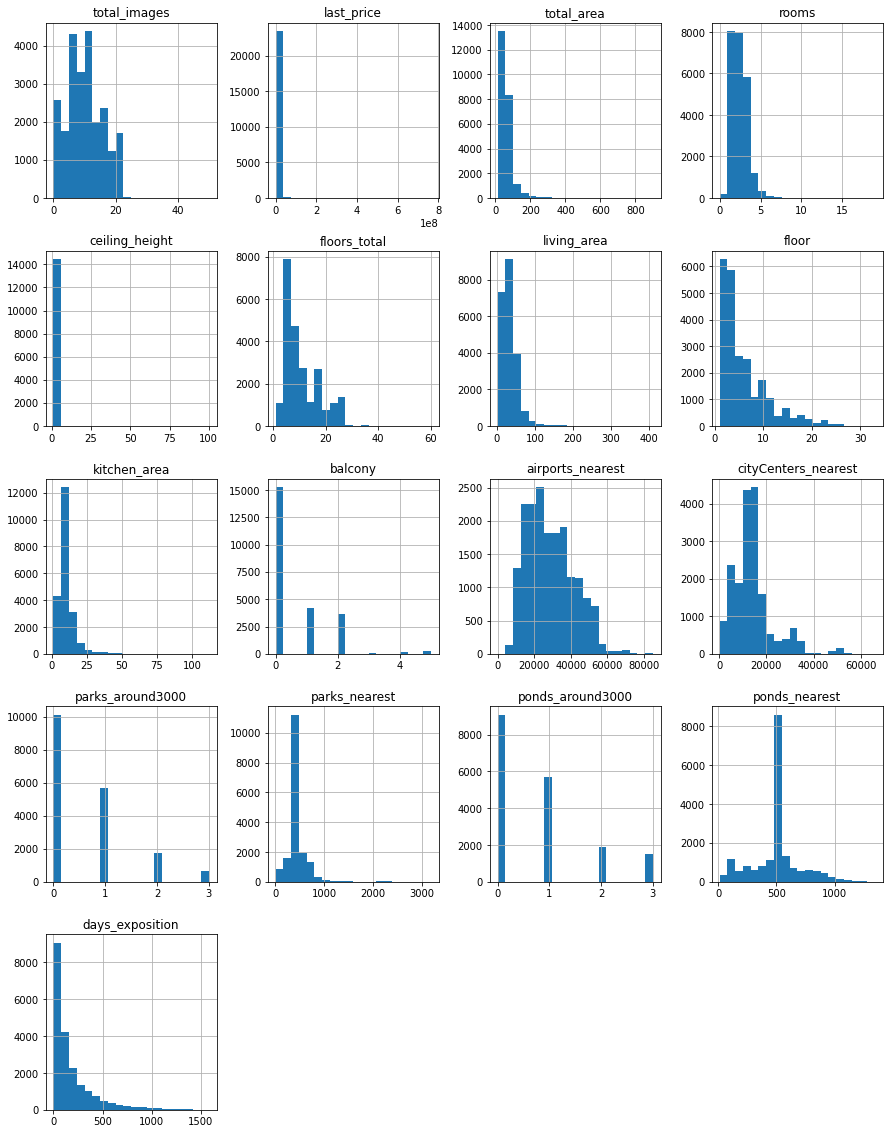

In [26]:
data.hist(bins=20, figsize=(15, 20))
plt.show();

Присутствует выброс нулевых значений в количестве парков и водоёмов в пределах 3 км при том, что большинство значений расстояния до ближайшего парка и водоёма находится в пределах до 3 км. Поскольку эти данные нам не нужны для исследования, можем оставить пропуски без изменения.  

5. `airports_nearest` и `cityCenters_nearest`

Мы не можем заполнить нулями `airports_nearest` и `cityCenters_nearest` - там нет ограничения по радиусу (как в тех же парках/водоемах), т.е. расстояние должно быть в любом случае.</div>

Создадим список уникальных городов, где отсутствуют данные в столбцах `airports_nearest` и `cityCenters_nearest`:

In [27]:
list_of_cities_NaN_airport_center = data.query('airports_nearest != airports_nearest and cityCenters_nearest != cityCenters_nearest')['locality_name'].unique()

Получаем координаты населенных пунктов по списку при помощи **Yandex Геокод** (т.к. одинаковые пгт могут быть в разных областях #страны/мира, добавляем к каждому запросу "Ленинградская область"):

In [28]:
import requests as r
url = 'https://geocode-maps.yandex.ru/1.x/?format=json&apikey=53864afc-cb1d-46c0-a164-db4b90630956&geocode=' #чтобы всё заработало, вставьте свой ключ, мой заблокировали и-за превышенного лимита
coordinates = []

for city in list_of_cities_NaN_airport_center:
    if city == city: # чтобы не столкнуться с NaN
        url_formatted = url + 'Ленинградская область ' + city
        response = r.get(url_formatted).json()
        df = response['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']
        coordinate = (float(df.split()[1]), float(df.split()[0]))
        coordinates.append(coordinate)
        
    else:
        coordinates.append('')
        
        

Формируем дата-фрейм в формате "населенный пункт - координаты":

In [29]:
cities_with_NaN_airport_center = pd.DataFrame({'Город':list_of_cities_NaN_airport_center, 'Координаты':coordinates})
cities_with_NaN_airport_center.head()

Город              Координаты
0  городской поселок Янино-1   (59.94814, 30.560524)
1                     Мурино  (60.051284, 30.438578)
2                  Сертолово  (60.143531, 30.217179)
3                    Кудрово  (59.908489, 30.513578)
4                   Коммунар  (59.621609, 30.393483)

Посмотрим, есть ли у нас пропущенные значения по заполненным координатам. Если есть, то во время итерации по данному столбцу может появиться ошибка

In [30]:
print(cities_with_NaN_airport_center.isna().sum())

Город         1
Координаты    0
dtype: int64


Удалим строку с NaN в столбце "Город":

In [31]:
cities_with_NaN_airport_center = cities_with_NaN_airport_center.dropna().reset_index(drop=True)
cities_with_NaN_airport_center.isna().sum()

Город         0
Координаты    0
dtype: int64

Учитывая то, что это небольшие города ("Санкт-Петербург" не в счёт), можно посчитать расстояние между конкретным населенным пунктом (точкой в центре него) и центром, и аэропортом.

Прописываем координаты центра Санкт-Петербурга и аэропортом "Пулково":

In [32]:
centre_coordinates = (59.946216, 30.311475)
airport_coordinates = (59.7998772, 30.2733421)

Добавляем в наш узкопрофильный датафрейм `cities_with_NaN_airport_center` 2 столбца - с расстоянием до центра города и до аэропорта (рассчитываем расстояние при помощи модуля `distance` из пакета `geopy`, его необходимо установить):

In [33]:
!pip install geopy

     |████████████████████████████████| 118 kB 1.3 MB/s eta 0:00:01


In [34]:
from geopy import distance
cities_with_NaN_airport_center['cityCenters_nearest'] = cities_with_NaN_airport_center['Координаты'].apply(
                                                        lambda x: distance.distance(x, centre_coordinates).m)
cities_with_NaN_airport_center['airports_nearest'] = cities_with_NaN_airport_center['Координаты'].apply(
                                                        lambda x: distance.distance(x, airport_coordinates).m)

cities_with_NaN_airport_center.head()

Город              Координаты  cityCenters_nearest  \
0  городской поселок Янино-1   (59.94814, 30.560524)         13920.724258   
1                     Мурино  (60.051284, 30.438578)         13686.938457   
2                  Сертолово  (60.143531, 30.217179)         22602.725555   
3                    Кудрово  (59.908489, 30.513578)         12058.334158   
4                   Коммунар  (59.621609, 30.393483)         36456.127015   

   airports_nearest  
0      23056.229206  
1      29494.466883  
2      38415.349605  
3      18102.532766  
4      20980.070039

Проверим, есть ли здесь Санкт-Петербург. Если есть, удалим его, т.к. расстояния будут рассчитаны некорректно. 

In [35]:
cities_with_NaN_airport_center.query('Город == "Санкт-Петербург"')

Город              Координаты  cityCenters_nearest  \
11  Санкт-Петербург  (59.939099, 30.315877)           830.214992   

    airports_nearest  
11        15692.6665

In [36]:
cities_with_NaN_airport_center.drop(cities_with_NaN_airport_center.index[12], inplace=True)
cities_with_NaN_airport_center.reset_index(inplace=True, drop=True)
cities_with_NaN_airport_center.head(15)

Город              Координаты  \
0         городской поселок Янино-1   (59.94814, 30.560524)   
1                            Мурино  (60.051284, 30.438578)   
2                         Сертолово  (60.143531, 30.217179)   
3                           Кудрово  (59.908489, 30.513578)   
4                          Коммунар  (59.621609, 30.393483)   
5     городской посёлок Красный Бор  (59.680974, 30.674673)   
6                           Гатчина   (59.56841, 30.122892)   
7               деревня Федоровское  (59.663731, 30.531167)   
8                            Выборг  (60.710496, 28.749781)   
9                           Кировск   (59.87533, 30.981457)   
10          деревня Новое Девяткино   (60.057325, 30.47637)   
11                  Санкт-Петербург  (59.939099, 30.315877)   
12      городской посёлок Сиверский  (59.354888, 30.067071)   
13                поселок Молодцово   (59.826216, 31.10219)   
14  городской посёлок Кузьмоловский  (60.109455, 30.495073)   

    cityCenters_nearest  airports_nearest  
0          13920.724258      23056.229206  
1          13686.938457      29494.466883  
2          22602.725555      38415.349605  
3          12058.334158      18102.532766  
4          36456.127015      20980.070039  
5          35896.726943      26169.709460  
6          43404.818448      27143.994528  
7          33800.804215      20985.555302  
8         121217.206326     131940.727897  
9          38308.327155      40586.164909  
10         15423.653448      30847.760808  
11           830.214992      15692.666500  
12         67303.612973      50925.945896  
13         46247.520283      46602.577315  
14         20869.638856      36648.230829

Были получены данные по каждому из известных нам населенных пунктов. Теперь можно заполнить пропуски в основном датафрейме в столбцах `cityCenters_nearest` и `airports_nearest` в соответствии с населенным пунктом. Для этого создадим словари формата - "населенный пункт:расстояние" (для столбцов `cityCenters_nearest` и `airports_nearest` по отдельности).

In [37]:
cityCenters_nearest_dict = dict(pd.Series(cities_with_NaN_airport_center['cityCenters_nearest'].values,
                                index=cities_with_NaN_airport_center['Город'].values))
airports_nearest_dict = dict(pd.Series(cities_with_NaN_airport_center['airports_nearest'].values,
                                index=cities_with_NaN_airport_center['Город'].values))

Проходим по основному датафрейму, заменяя пропуски в столбцах `cityCenters_nearest` и `airports_nearest` на подсчитанные значения:

In [38]:
data.loc[data['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = data['locality_name'].map(cityCenters_nearest_dict)
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = data['locality_name'].map(airports_nearest_dict)

Проверяем:

In [39]:
data[data['locality_name'] != 'Санкт-Петербург'][['locality_name', 'cityCenters_nearest', 'airports_nearest']].head(10)

locality_name  cityCenters_nearest  airports_nearest
1              поселок Шушары         18603.000000      12817.000000
5   городской поселок Янино-1         13920.724258      23056.229206
6           поселок Парголово         19143.000000      52996.000000
8                      Мурино         13686.938457      29494.466883
11                  Ломоносов         51677.000000      48252.000000
12                  Сертолово         22602.725555      38415.349605
13                   Петергоф         33058.000000      37868.000000
14                     Пушкин         30759.000000      20782.000000
20          поселок Парголово         19311.000000      53134.000000
22                    Кудрово         12058.334158      18102.532766

Проверяем, как изменилось количество пропусков:

In [40]:
print('Количество NaN по airports_nearest:', data['airports_nearest'].isna().sum())
print('Количество NaN по cityCenters_nearest:', data['cityCenters_nearest'].isna().sum())

Количество NaN по airports_nearest: 23
Количество NaN по cityCenters_nearest: 24


Осталось совсем маленькое количество незаполненных ячеек по столбцам `cityCenters_nearest` и `airports_nearest`. Допустимо их проигнорировать.

6. `ceiling_height`

Посмотрим график с высотой потолков. Доля пропусков достаточно высокая, а также, по графику видно, что есть выбросы. Далее посмотрим на уникальные значения данного столбца.

Построим график и посмотрим на уникальные значения, чтобы увидеть выбросы.

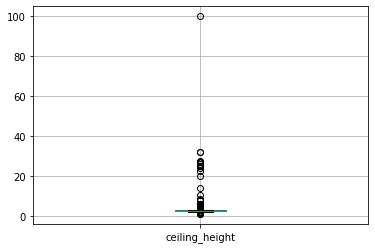

In [41]:
import matplotlib.pyplot as plt

data.boxplot(column='ceiling_height')
plt.show()

In [42]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Заменим аномальные значения на более схожие к реальности. 

In [43]:
data['ceiling_height'] = data['ceiling_height'].replace({ 
    25.00: 2.5,
    27.00: 2.7,
    32.00: 3.2,
    24.00: 2.4,
    26.00 : 2.6,
    14.00: 1.4,
    20.00: 2.0,
    27.50: 2.75,
    22.60: 2.26,
    10.30: 1.03,
    100.00: 1.00
})

#проверяем
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87,
       2.66, 2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55,
       3.16, 3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95,
       4.06, 2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 ,
       3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63,
       3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19,
       3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 8.  ,
       3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 ,
       2.93, 3.46, 3.47, 3.33, 3.63, 3.32, 1.2 , 8.3 , 2.98, 2.86, 3.17,
       4.4 , 3.28, 3.04, 4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78,
       4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.

Однако, потолок не может быть менее 2 м и не более 4 м в квартире, поэтому необходимо отсеять значения, выходящие за пределы промежутка нормальных значений. 

In [44]:
print('Количество пропущенных значений в ceiling_height:', data['ceiling_height'].isna().sum())

Количество пропущенных значений в ceiling_height: 9195


Категоризируем все строки по удаленности от центра (где это возможно) и возьмем среднее по высоте потолков там, чтобы заполнить пропуски.


Будут следующие категории:

1. Категория 'самый центр': 0-2км от центра; 
2. Категория 'центр': 2-5км от центра;
3. Категория 'близко': 5-14 км от центра;
4. Категория 'пгт': >14 км от центра. 

Напишем соответствующую функцию: 

In [45]:
def fillna_ceiling_height(row):
    if row['cityCenters_nearest'] < 2500:
        return 'самый центр'
    elif row['cityCenters_nearest'] < 5000:
        return 'центр'
    elif row['cityCenters_nearest'] < 14000: 
        return 'в пределах города'
    elif row['cityCenters_nearest'] >= 14000: #14000 - это среднее значение
        return 'область'
    
data['fromcenter_category'] = data.apply(fillna_ceiling_height, axis=1)

Смотрим на результат:

In [46]:
data[['locality_name', 'cityCenters_nearest', 'fromcenter_category']].head(10)

locality_name  cityCenters_nearest fromcenter_category
0            Санкт-Петербург         16028.000000             область
1             поселок Шушары         18603.000000             область
2            Санкт-Петербург         13933.000000   в пределах города
3            Санкт-Петербург          6800.000000   в пределах города
4            Санкт-Петербург          8098.000000   в пределах города
5  городской поселок Янино-1         13920.724258   в пределах города
6          поселок Парголово         19143.000000             область
7            Санкт-Петербург         11634.000000   в пределах города
8                     Мурино         13686.938457   в пределах города
9            Санкт-Петербург         15008.000000             область

Заполним пропуски в столбце `ceiling_height` средним по каждой группе `fromcenter_categor`y (кроме строк, где NaN в `cityCenters_nearest` - там мы не можем узнать, центр это или, например, почти область, поэтому не будем трогать):

In [47]:
data.groupby('fromcenter_category')['ceiling_height'].median().sort_values(ascending=False).to_frame()

ceiling_height
fromcenter_category                
самый центр                    3.20
центр                          3.08
в пределах города              2.70
область                        2.60

Чем ближе центр, тем выше потолок. 

Заполним пропуски в `ceiling_height` медианными значениями в зависимости от категории:

In [48]:
list_of_fromcenter_category = ['самый центр', 'центр', 'близко к центру', 'ближе к области/область']
for column in list_of_fromcenter_category:
    value_for_filling = data.groupby('fromcenter_category')['ceiling_height'].mean().get(key=column)
    data['ceiling_height'] = data.groupby('fromcenter_category')['ceiling_height'].apply(lambda x: x.fillna(x.median()))

data['ceiling_height'] = data.groupby('fromcenter_category')['ceiling_height'].apply(lambda x: x.fillna(x.median()))

Смотрим на изменения:

In [49]:
data.head(30)

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00      2   
13            20   3550000.0       42.80  2017-07-01T00:00:00      2   
14             1   4400000.0       36.00  2016-06-23T00:00:00      1   
15            16   4650000.0       39.00  2017-11-18T00:00:00      1   
16            11   6700000.0       82.00  2017-11-23T00:00:00      3   
17             6   4180000.0       36.00  2016-09-09T00:00:00      1   
18             8   3250000.0       31.00  2017-01-27T00:00:00      1   
19            16  14200000.0      121.00  2019-01-09T00:00:00      3   
20            12   6120000.0       80.00  2017-09-28T00:00:00      3   
21            13   3200000.0       31.60  2018-03-14T00:00:00      1   
22            20   5000000.0       58.00  2017-04-24T00:00:00      2   
23            11   2950000.0       32.00  2016-10-29T00:00:00      1   
24             8   6500000.0       97.20  2015-10-31T00:00:00      2   
25             3   6800000.0       76.00  2015-10-01T00:00:00      2   
26             6   4050000.0       60.00  2017-04-28T00:00:00      4   
27            20   7100000.0       70.00  2017-05-12T00:00:00      3   
28             8   4170000.0       44.00  2017-12-13T00:00:00      1   
29             9   8600000.0      100.00  2016-04-09T00:00:00      3   

    ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.70          16.0        51.00      8          NaN  ...   
1             2.60          11.0        18.60      1          NaN  ...   
2             2.70           5.0        34.30      4          NaN  ...   
3             2.70          14.0          NaN      9          NaN  ...   
4             3.03          14.0        32.00     13          NaN  ...   
5             2.70          12.0        14.40      5          NaN  ...   
6             2.60          26.0        10.60      6          NaN  ...   
7             2.70          24.0          NaN     22          NaN  ...   
8             2.70          27.0        15.43     26          NaN  ...   
9             2.50           9.0        43.60      7          NaN  ...   
10            2.67          12.0        20.30      3          NaN  ...   
11            2.60           5.0        31.00      4        False  ...   
12            2.60           5.0        30.00      5          NaN  ...   
13            2.56           5.0        27.00      5          NaN  ...   
14            2.60           6.0        17.00      1          NaN  ...   
15            2.60          14.0        20.50      5          NaN  ...   
16            3.05           5.0        55.60      1          NaN  ...   
17            2.60          17.0        16.50      7          NaN  ...   
18            2.50           5.0        19.40      2          NaN  ...   
19            2.75          16.0        76.00      8          NaN  ...   
20            2.70          27.0        48.00     11          NaN  ...   
21            2.70           5.0        16.90      2          NaN  ...   
22            2.75          25.0        30.00     15          NaN  ..

In [50]:
print('Количество пропущенных значений в ceiling_height после изменений :', data['ceiling_height'].isna().sum())

Количество пропущенных значений в ceiling_height после изменений : 24


7. `days_exposition`

In [51]:
print('Количество NaN по days_exposition:', data['days_exposition'].isna().sum())

Количество NaN по days_exposition: 3181


Это важный параметр для оценки влияния на цену продажи квартиры. Однако, нецелесообразно заполнять пропущенные значения средним или медианным значением. Оставляем без изменений.

8. `kitchen_area`, `living_area` 

In [52]:
print('Количество NaN по kitchen_area:', data['kitchen_area'].isna().sum())
print('Количество NaN по living_area:', data['living_area'].isna().sum())

Количество NaN по kitchen_area: 2278
Количество NaN по living_area: 1903


Рассмотрим ситуацию по студиям:

In [53]:
data.query('rooms == 0')[['kitchen_area', 'living_area']].isna().sum()

kitchen_area    197
living_area      14
dtype: int64

Малая часть пропусков по этим столбцам относится к студиям. Да и с ними нам нечего делать - не делить же пополам общую площадь. Оставляем как есть.

9. `floors_total`

In [54]:
print('Количество NaN по floors_total:', data['floors_total'].isna().sum())

Количество NaN по floors_total: 86


Доля пропущенных значений здесь менее 1%, поэтому этими данными можем пренебречь. Оставим всё, как есть.

10. `locality_name`

Проверим, есть ли данные по расстоянию от центра города, чтобы хотя бы предположить, что эта квартира находится в пределах Санкт-Петербурга:

In [55]:
print('Количество NaN по locality_name:', data['locality_name'].isna().sum())
data[(data['locality_name'].isna())][['locality_name', 'cityCenters_nearest']].head()

Количество NaN по locality_name: 49


locality_name  cityCenters_nearest
1097           NaN               4258.0
2033           NaN                  NaN
2603           NaN              17369.0
2632           NaN              17369.0
3574           NaN               8127.0

Мы видим, что в части строк, где не указан город, есть информация по расстоянию от центра. Как и ранее брали при категоризации по удаленности от центра, возьмем за основу, что < 14 км от центра - это город, > 14 км - область. Т.к. "область" мы проставить не можем, оставим там NaN, а где расстояние будет < 10 км, там проставим "Санкт-Петербург".

In [56]:
data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] < 10000), 'locality_name'] = data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] < 10000), 'locality_name'].fillna('Санкт-Петербург')


print('Количество NaN по locality_name:', data['locality_name'].isna().sum())

Количество NaN по locality_name: 24


**Обновим данные по пропускам:**

(<AxesSubplot:title={'center':'% of NaN (из 23699 строк)'}, xlabel='Count of NaN'>,
 9.269565217391303)

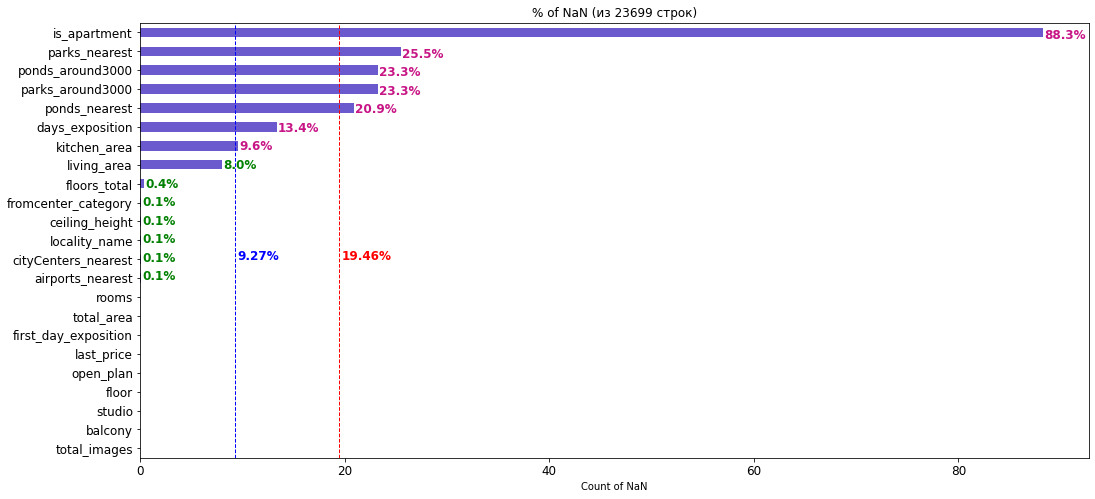

In [57]:
percent_hbar(data, threshold)

Общая ситуация с пропусками улучшилась, но не полностью: есть 20,9-25,5% строк с пропущенными картографическими данными. 

**2.4 Изменение типов данных**

Посмотрим ещё раз общую информацию о датафрейме:

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23675 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23675 non-null  object 
 15  airports_nearest   

Необходимо изменить тип данных для удобства работы с ними далее. Там, где предполагается тип данных "числовой", если речь идёт о  высоте, площади, цене - оставляем `float`и округляем до 1-ого знака запятой, а если о количестве, например, этажей - меняем на `int`, а также расстояние - так они в метрах. Тип данных в столбце `is_apartment` нет смысла менять на `bool`, так как получившийся результат будет нереалистичным (50 апартаментов из 23699 объявлений - нонсенс). Тип данных о дате публикации меняем на `datetime` в соответствии с заданным форматом. 

Для того, чтобы не менять тип данных несколько раз: изменим тип данных на datetime в столбце `first_day_exposition`; добавим новые стобцы **из Шага 3**; меняем тип данных для всех остальных столбцов, где это необходимо. 

Меняем формат столбца `first_day_exposition`:

In [59]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### Шаг 3. (3.1) Добавление новых столбцов

Посчитаем и добавим цену квадратного метра:

In [60]:
data['price_of_m2'] = data['last_price']/data['total_area']

Добавим год, месяц публикации объявления:

In [61]:
data['year'] = data['first_day_exposition'].apply(lambda x: x.year)
data['month'] = data['first_day_exposition'].apply(lambda x: x.month)

Добавим день недели публикации объявления. Сначала проставим день недели в формате числа (1 - понедельник, 7 - воскресенье). Далее создадим словарь, чтобы изменить значение с чисел на текст (напр., 'суббота'). 

In [62]:
data['day'] = data['first_day_exposition'].apply(lambda x: x.isoweekday())
dict_of_weekdays = {1: '1 - понедельник', 2: '2 - вторник', 3: '3 - среда', 4: '4 - четверг', 
                    5: '5 - пятница', 6: '6 - суббота', 7: '7 - воскресенье'}
data['day'] = data['day'].map(dict_of_weekdays)

Добавим категорию по этажам (варианты — 'первый', 'последний', 'другой'):

In [63]:
data['level'] = np.where(data['floor'] == 1, 'первый', 'другой')
data['level'] = np.where(data['floor'] == data['floors_total'], 'последний', data['level'])

Добавим столбцы с соотношением жилой и общей площади, а также с отношением площади кухни к общей. Потом округлим их до 2-ух знаков после запятой.

In [64]:
data['living_area_part'] = data['living_area']/data['total_area']
data['kitchen_area_part'] = data['kitchen_area']/data['total_area']

Добавим стобец с расстоянием до центра города в километрах

In [65]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

Проверяем:

In [66]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1            2.60          11.0         18.6      1          NaN  ...   
2            2.70           5.0         34.3      4          NaN  ...   
3            2.70          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   days_exposition  fromcenter_category    price_of_m2  year month  \
0              NaN              область  120370.370370  2019     3   
1             81.0              область   82920.792079  2018    12   
2            558.0    в пределах города   92785.714286  2015     8   
3            424.0    в пределах города  408176.100629  2015     7   
4            121.0    в пределах города  100000.000000  2018     6   

           day   level  living_area_part  kitchen_area_part  \
0  4 - четверг  другой          0.472222           0.231481   
1  2 - вторник  первый          0.460396           0.272277   
2  4 - четверг  другой          0.612500           0.148214   
3  5 - пятница  другой               NaN                NaN   
4  2 - вторник  другой          0.320000           0.410000   

   cityCenters_nearest_km  
0                  16.028  
1                  18.603  
2                  13.933  
3                   6.800  
4                   8.098  

[5 rows x 31 columns]

**2.4. (3.2.) Изменение типов данных**

Сформируем список столбцов для приведения к типу `int`. Далее меняем тип данных.

In [67]:
list_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'price_of_m2']

for column in list_to_int:
    data[column] = data[data[column].notnull()][column].astype('int')
   
data.info() #проверяем 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  int64         
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23675 non-null  float64       
 6   floors_total            23613 non-null  float64       
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            2775 non-null   object        
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

Округляем данные до 1 знака после запятой в столбцах, указанных в списке `list_to_float_1`:

In [68]:
list_to_float_1 = ['total_area','ceiling_height', 'living_area', 'kitchen_area']

for column in list_to_float_1:
    data[column] = data[data[column].notnull()][column].round(1)

Oкругляем данные до 2 знаков после запятой в столбцах, указанных в списке `list_to_float_2`:

In [69]:
list_to_float_2 = ['living_area_part', 'kitchen_area_part']
for column in list_to_float_2:
    data[column] = data[data[column].notnull()][column].round(2)

Проверяем, что получилось:

In [70]:
data.head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   
5            10     2890000        30.4           2018-09-10      1   
6             6     3700000        37.3           2017-11-02      1   
7             5     7915000        71.6           2019-04-18      2   
8            20     2900000        33.2           2018-05-23      1   
9            18     5400000        61.0           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.7          16.0         51.0      8          NaN  ...   
1             2.6          11.0         18.6      1          NaN  ...   
2             2.7           5.0         34.3      4          NaN  ...   
3             2.7          14.0          NaN      9          NaN  ...   
4             3.0          14.0         32.0     13          NaN  ...   
5             2.7          12.0         14.4      5          NaN  ...   
6             2.6          26.0         10.6      6          NaN  ...   
7             2.7          24.0          NaN     22          NaN  ...   
8             2.7          27.0         15.4     26          NaN  ...   
9             2.5           9.0         43.6      7          NaN  ...   

   days_exposition  fromcenter_category  price_of_m2  year month  \
0              NaN              область       120370  2019     3   
1             81.0              область        82920  2018    12   
2            558.0    в пределах города        92785  2015     8   
3            424.0    в пределах города       408176  2015     7   
4            121.0    в пределах города       100000  2018     6   
5             55.0    в пределах города        95065  2018     9   
6            155.0              область        99195  2017    11   
7              NaN    в пределах города       110544  2019     4   
8            189.0    в пределах города        87454  2018     5   
9            289.0              область        88524  2017     2   

               day   level  living_area_part  kitchen_area_part  \
0      4 - четверг  другой              0.47               0.23   
1      2 - вторник  первый              0.46               0.27   
2      4 - четверг  другой              0.61               0.15   
3      5 - пятница  другой               NaN                NaN   
4      2 - вторник  другой              0.32               0.41   
5  1 - понедельник  другой              0.47               0.30   
6      4 - четверг  другой              0.28               0.39   
7      4 - четверг  другой               NaN               0.26   
8        3 - среда  другой              0.47               0.27   
9  7 - воскресенье  другой              0.71               0.11   

   cityCenters_nearest_km  
0               16.028000  
1               18.603000  
2               13.933000  
3                6.800000  
4                8.098000  
5               13.920724  
6               19.143000  
7               11.634000  
8               13.686938  
9               15.008000  

[10 rows x 31 columns]

Добавим столбец с расстоянием в км до центра города:

In [71]:
data['last_price'] = (data[data['last_price'].notnull()]['last_price']/1000*1.0).round().astype(int)
data['price_of_m2'] = (data[data['price_of_m2'].notnull()]['price_of_m2']/1000*1.0).round(3)

### Шаг 4. Исследовательский анализ данных 


**Необходимо изучить следующие параметры объектов**: общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков; этаж квартиры; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего аэропорта; расстояние до ближайшего парка; день и месяц публикации объявления.

**4.1. Изучаем следующие параметры: общая площадь, цена, количество комнат, высота потолков.**

In [72]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

total_area     last_price         rooms  ceiling_height
count  23699.000000   23699.000000  23699.000000    23675.000000
mean      60.348635    6541.548800      2.070636        2.711975
std       35.654086   10887.012837      1.078405        0.247230
min       12.000000      12.000000      0.000000        1.000000
25%       40.000000    3400.000000      1.000000        2.600000
50%       52.000000    4650.000000      2.000000        2.600000
75%       69.900000    6800.000000      3.000000        2.700000
max      900.000000  763000.000000     19.000000        8.300000

По общей площади есть как квартира 12 кв.м., так и 900 кв.м. Однако, среднее и медианное значения выглядят приемлемыми.
По цене за квартиру - есть варианты как за 12 тысяч рублей, так и за 763 млн, на покупателей с разным доходом.
По количеству комнат - от 0 (студия) до 19. Возможно, это общежития или нежилые помещения. Хотя в среднем популярны двушки.
Высота потолков - от 1 до 8.3 метров. Ну 8 м - куда не шло.

Нарисуем гистограммы и одну круговую диаграмму (для получения распределению по количеству комнат) их распределения и определим выбросы по каждому из набора данных (что лежит за пределами "усов"):

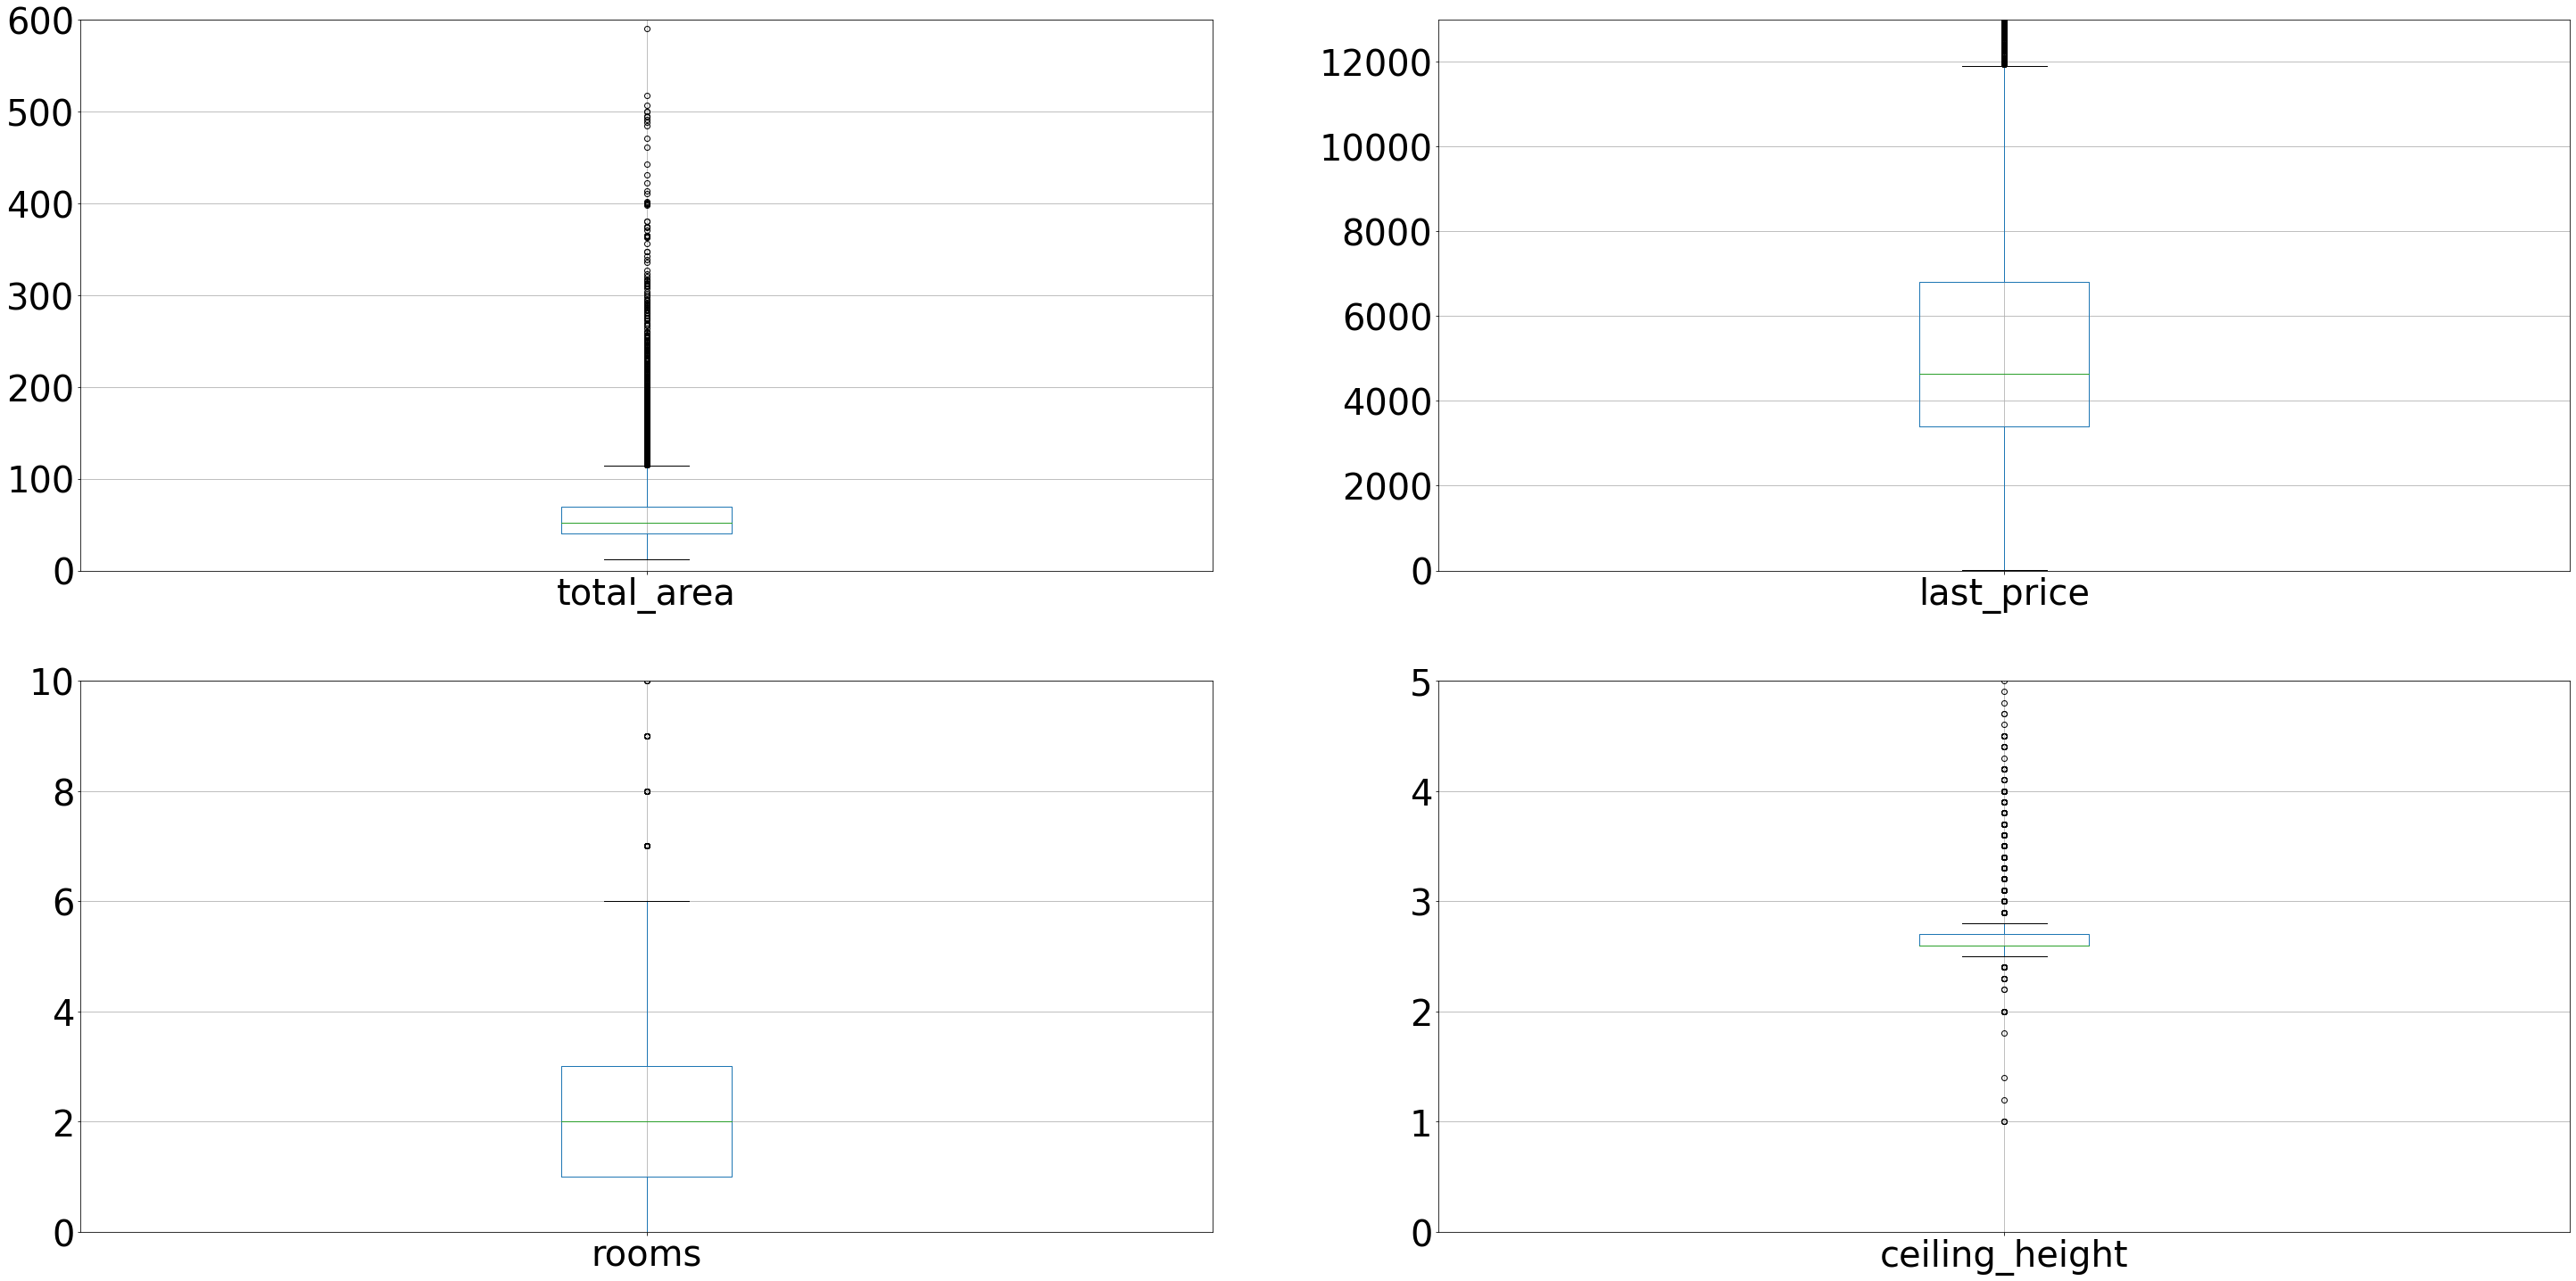

In [73]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [600, 13000, 10, 5]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = data.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

Определим границы:

`total_area` - 20-130 кв.м.;
`last_price` - 0-12 млн р.;
`rooms` - 0-6 комнат;
`ceiling_height` - 2,4-3,25м.

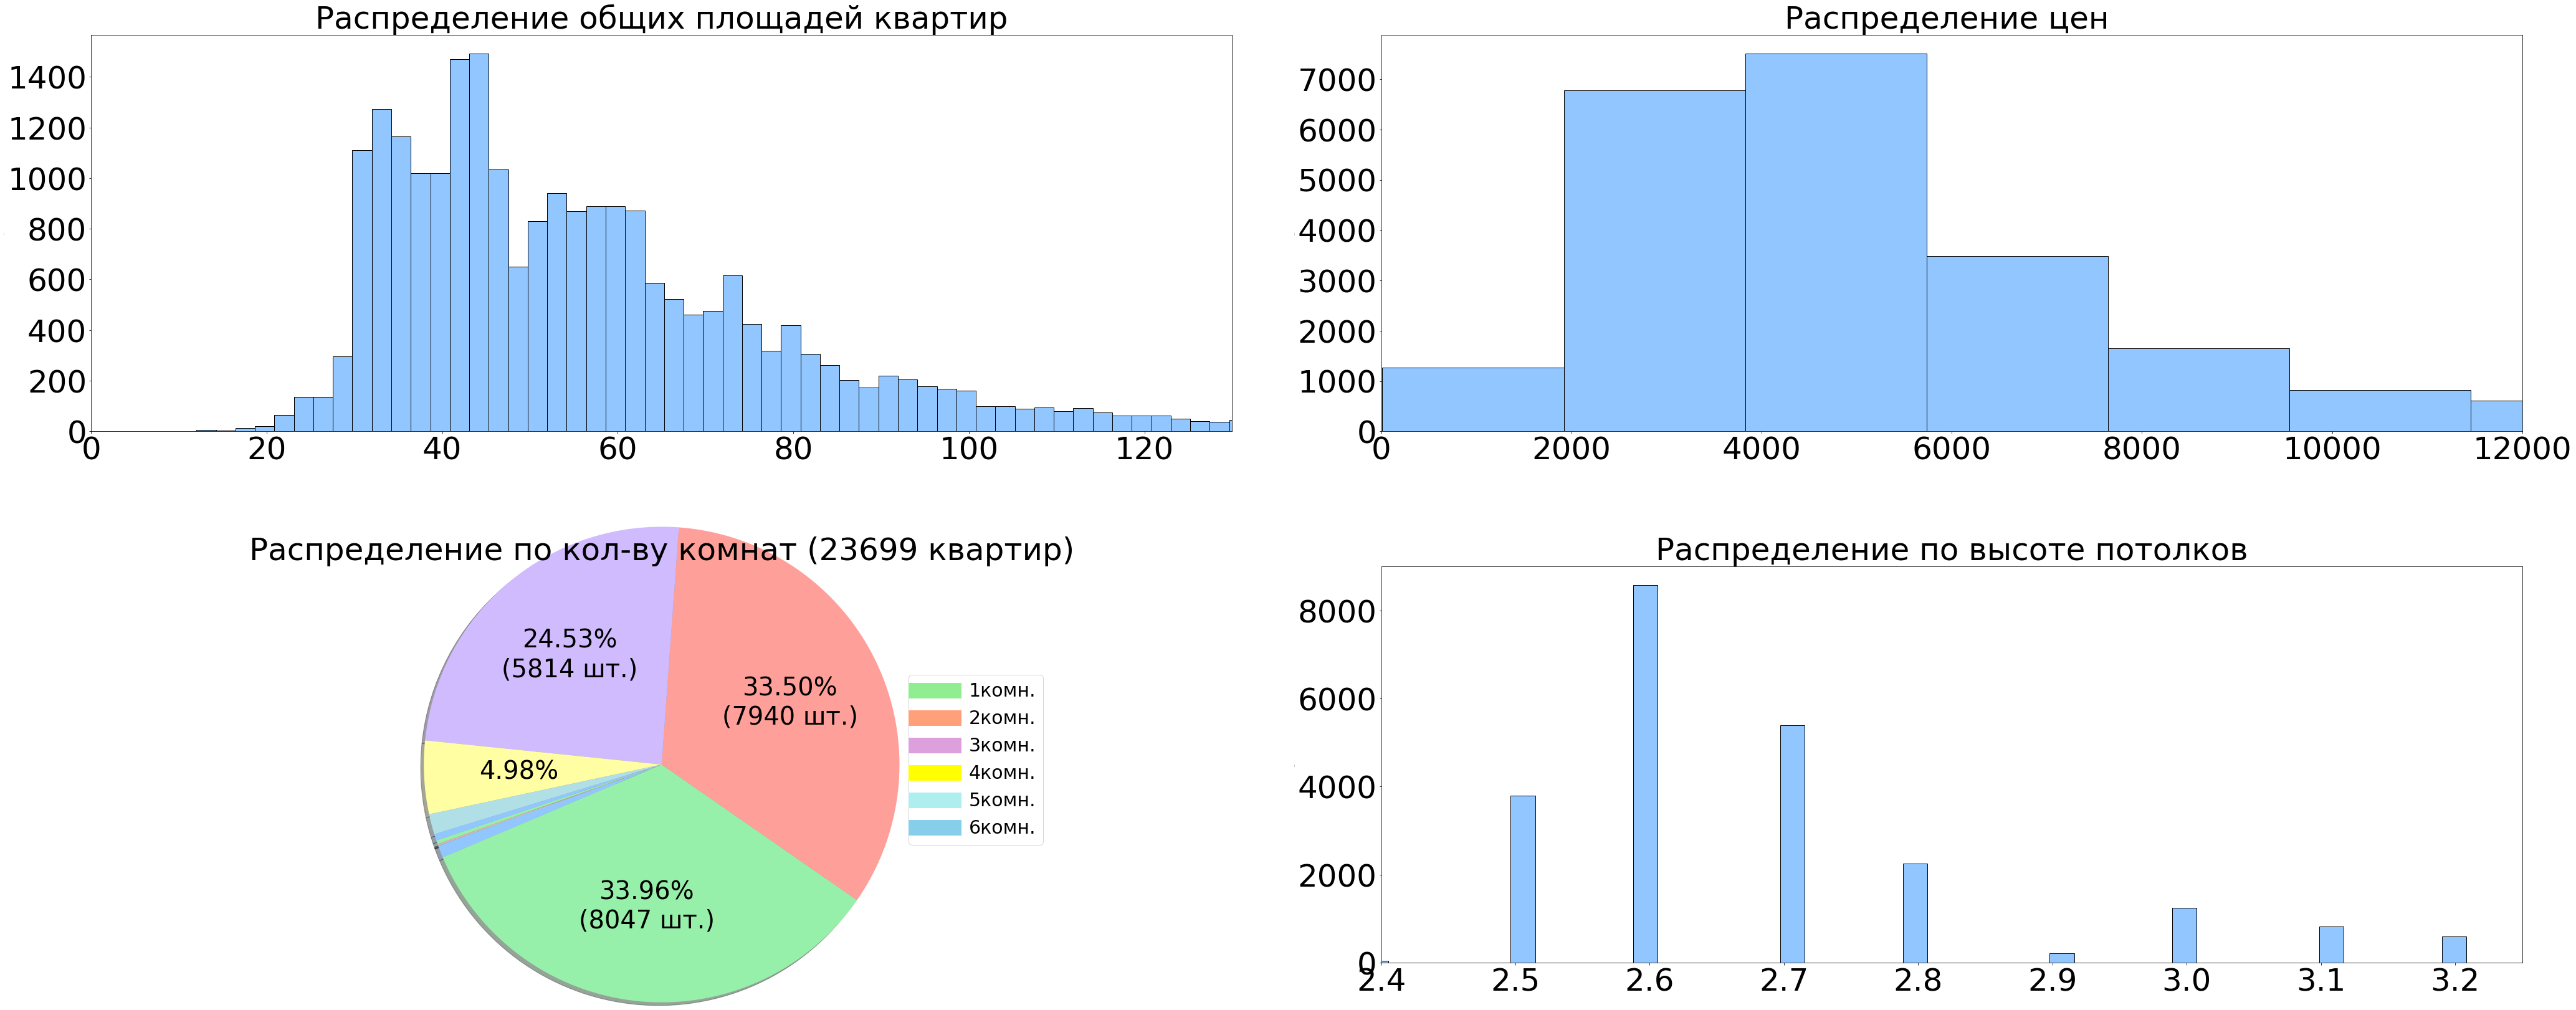

In [74]:
from matplotlib.lines import Line2D

plt.style.use('seaborn-pastel') # установим, чтоб цвета круговой диаграммы всегда соотвествовали легенде

# создаем отдельную сводную таблицу для создания круговой диаграммы
rooms_pivot = data.pivot_table(index='rooms', values='last_price', aggfunc='count')

df_list = [data['total_area'], data['last_price'], data['rooms'], data['ceiling_height']]
df_titles_list = ['Распределение общих площадей квартир', 'Распределение цен ', 
                  'Распределение по кол-ву комнат (23699 квартир)', 'Распределение по высоте потолков']
xlims_list = [130, 12000, 12, 3.25]
nrow = 2
ncol = 2

def func_pct(pct, data, sum_of_all):
    value = float(pct/100.*sum_of_all)
    if value > 5000:
        return "{:.2f}%\n({:.0f} шт.)".format(pct, value)
    elif value > 1000:
        return "{:.2f}%".format(pct)
    else:
        return ''

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(60,25))
count = 0
for r in range(nrow):
    for c in range(ncol):
        if df_titles_list[count] == 'Распределение по кол-ву комнат (23699 квартир)':
            sum_filt_data = rooms_pivot.sum()
            data_for_pct = rooms_pivot
            ax = rooms_pivot.plot(kind='pie', y="last_price", labels=None,
                                                            autopct = lambda pct: func_pct(pct,data_for_pct,sum_filt_data),
                                                            radius=1.5, shadow=True, startangle=200, fontsize=40,
                                                            title=df_titles_list[count], legend=True, 
                                                            pctdistance=0.6, labeldistance=0.5, ax=axes[r,c])
            custom_lines = [Line2D([0], [0], color='lightgreen', lw=25),
                            Line2D([0], [0], color='lightsalmon', lw=25),
                            Line2D([0], [0], color='plum', lw=25),
                            Line2D([0], [0], color='yellow', lw=25),
                            Line2D([0], [0], color='paleturquoise', lw=25),
                            Line2D([0], [0], color='skyblue', lw=25)]
            ax.title.set_size(50)
            ax.title.set_position([0.5, 1.5])
            ax.set_ylabel('')
            ax.legend(custom_lines, ['1комн.', '2комн.', '3комн.', '4комн.', '5комн.', '6комн.'], 
                      bbox_to_anchor=(1.1,0.75), prop={'size':30})
            plt.tight_layout(pad=10)
        else:
            ax = df_list[count].plot(kind='hist', bins=400, fontsize=50, title=df_titles_list[count], 
                                     ec='black', ax=axes[r,c])
            if count == 3:
                ax.set_xlim(2.4, xlims_list[count])
                ax.title.set_position([0.5, 1.15])
            else:
                ax.set_xlim(0, xlims_list[count])
            ax.title.set_size(50)
            ax.yaxis.label.set_size(0)
        count += 1
        
        

**Гистограмма "Распределение площадей":** Большая часть квартир имеет метраж от 30 до 80 кв.м., пик приходится на 50 кв.м. Есть квартиры и по 800 кв.м, но их гораздо меньше.

**Гистограмма "Распределение цен":** частовстречаемая цена на квартиры лежит в промежутке от 2 до 12 млн. Большая часть квартир продается за цену в промежутке между 4 и 6 млн.Такэе есь выбросы.

**Круговая диаграмма "Распределение по количеству комнат":** 2/3 квартир имеют 1 или 2 комнаты, чуть меньший процент имеют 3 комнаты и небольшое количество - 4, далее все остальные.

**Гистограмма "Распределение по высоте потолков":** квартиры, в большинстве своем, имеют потолки от 2,5-2,7м (самый частовстречаемый вариант) до 3,2м. Остальные случаи - либо экслюзив, либо выброс.

**4.2. Изучаем следующий параметр: время продажи квартиры**

Посмотрим на данные и гистограмму по времени продажи квартиры:

In [75]:
data['days_exposition'].describe().to_frame()

days_exposition
count     20518.000000
mean        180.888634
std         219.727988
min           1.000000
25%          45.000000
50%          95.000000
75%         232.000000
max        1580.000000

<AxesSubplot:>

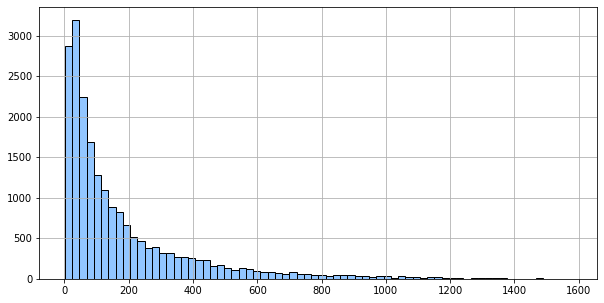

In [76]:
data['days_exposition'].hist(bins=70, figsize=(10,5), ec='black')

Есть квартиры, которые продавались 5 лет (1580 дней) ? Вполне возможно, однако, есть вероятность, что это те объявления, которые вовремя не были закрыты, в связи с чем срок продажи не соответствует действительности и имеет очень большое значение.
Среднее время продажи - полгода, 180 дней. Медианное - 95 дней.
3-6 месяца для продажи квартиры - это нормальный срок. 

Большая часть квартир продавалась в течение первых 50 дней, есть и квартиры, которые продавались до года. Чем дальше, тем реже встречаются такие случаи.

<AxesSubplot:>

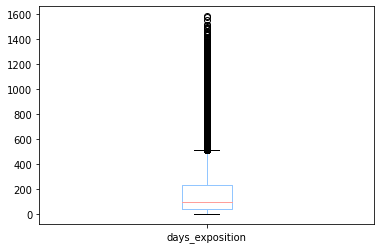

In [77]:
data.plot(kind='box', y='days_exposition')

Очень плотно. Ограничусь 300 днями, чтобы убрать выбросы.

<AxesSubplot:>

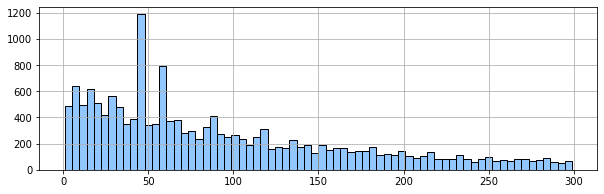

In [78]:
data.query('days_exposition<300')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

Наблюдаются пики продаж в 45 и 60 дней. Посмотрим на них ближе.

<AxesSubplot:>

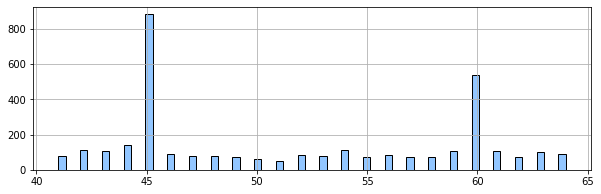

In [79]:
data.query('40<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

Вполне возможно, что сделки закрываются следующим образом: раз в 15 дней или на почту продавцу приходит вопрос, продал ли он квартиру, он заходит и делает соответствующую пометку, или ему звонит оператор и по телефону задает тот же вопрос и закрывает/не закрывает объявление согласно полученной информации. Таким образом, учитывая то, что многие самостоятельно не закрывают объявления, то большая часть квартир продается в пределах 60 дней с момента публикации объявления и что проверка производится раз в 15 дней, имеем такие вот данные. На всякий случай, следует учесть ещё и другое количество дней, кратное 15, - 30:

<AxesSubplot:>

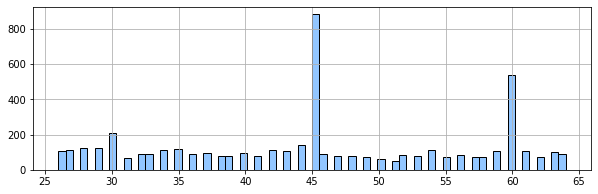

In [80]:
data.query('25<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

Гипотеза подтвердилась. 

4.3. Изучим данные по жилой площади и площади кухни

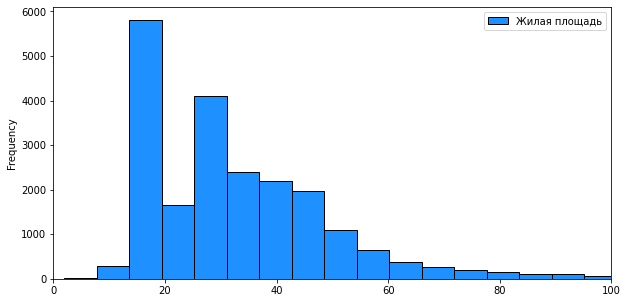

In [81]:
ax = plt.gca()

data['living_area'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='dodgerblue', xlim=(0, 100))
plt.legend(['Жилая площадь'])

График жилой площади похож на график общей площади. Большая часть жилой площади квартир имеет метраж от 10 до 45 кв.м., пик приходится на 15 кв.м. Есть квартиры с жилой площадью  и по 100 кв.м, но они в меньшинстве

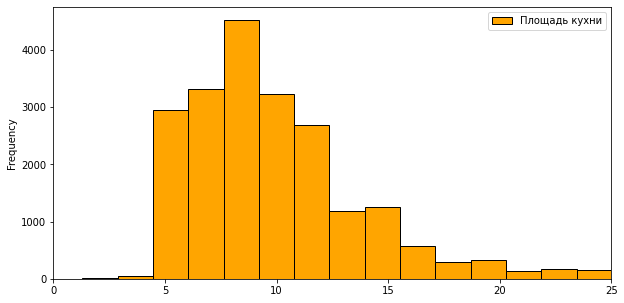

In [82]:
ax = plt.gca()

data['kitchen_area'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='orange', xlim=(0, 25))
plt.legend(['Площадь кухни'])

Большая часть площадь кухни квартир имеет метраж от 4,7 до 12,3 кв.м., пик приходится на 8-9 кв.м

**4.4.Изучим параметры: этаж квартиры, общее количество этажей в доме.**

На тип этажа квартиры («первый», «последний», «другой») посмотрим в другом разделе.


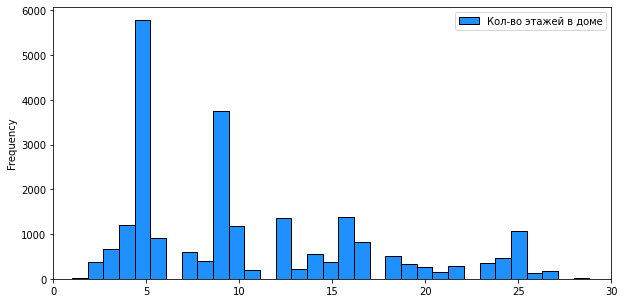

In [83]:
ax = plt.gca()

data['floors_total'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='dodgerblue', xlim=(0, 30))
plt.legend(['Кол-во этажей в доме'])

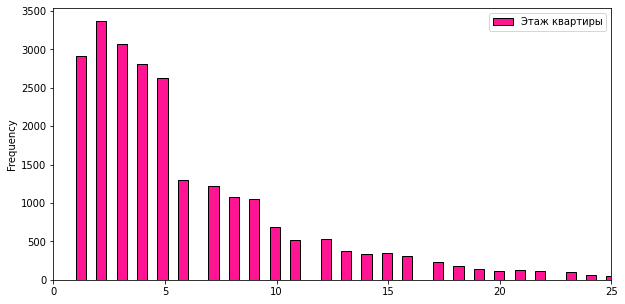

In [84]:
ax = plt.gca()

data['floor'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='deeppink', xlim=(0, 25))
plt.legend(['Этаж квартиры'])

Есть дома с количеством этажем от 1 до 30, но чаще всего встречаются всем нам знакомые 5-и-этажки и 9-и-этажки. Популярнее всего средние этажи, 3-4 этажи у 5-и-этажек, 7-8 тажи у 9-и-этажек.

**4.5. Изучаем: расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка.**


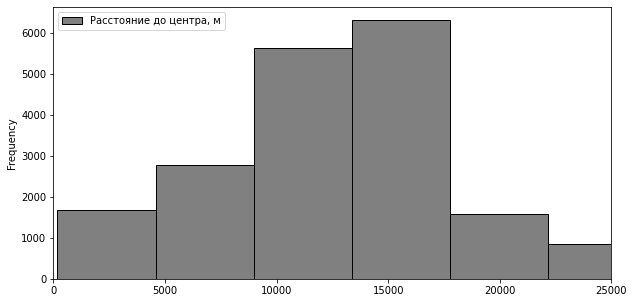

In [85]:
ax = plt.gca()
data['cityCenters_nearest'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='grey', xlim=(0, 25000))
plt.legend(['Расстояние до центра, м'])

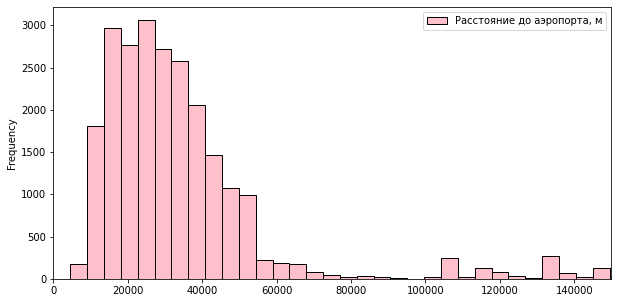

In [86]:
ax = plt.gca()
data['airports_nearest'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='pink', xlim=(0, 150000))
plt.legend(['Расстояние до аэропорта, м'])

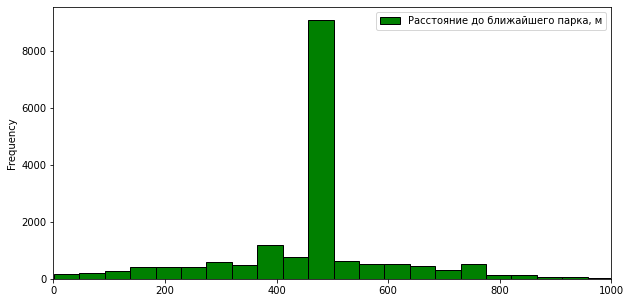

In [87]:
ax = plt.gca()
data['parks_nearest'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='green', xlim=(0,1000))
plt.legend(['Расстояние до ближайшего парка, м'])

Чаще всего встречаются квартиры, которые находятся в 15 км от центра города, в 15-35 км от аэропорта и в 460 м от ближайшего парка. 

**4.6.День и месяц публикации объявления.**

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  int64         
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23675 non-null  float64       
 6   floors_total            23613 non-null  float64       
 7   living_area             21796 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            2775 non-null   object        
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

<AxesSubplot:>

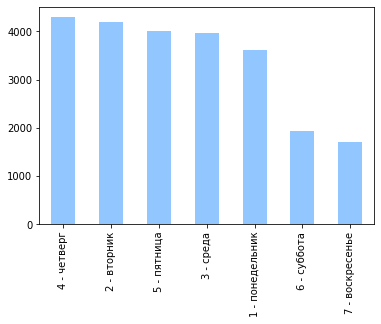

In [89]:
ax = plt.gca()
data['day'].value_counts().plot(kind='bar')


<AxesSubplot:>

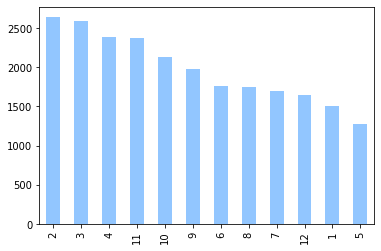

In [90]:
ax = plt.gca()
data['month'].value_counts().plot(kind='bar')

Интересно, что объявления о продаже чаще всего опубликовывались в четверг, а если брать месяц- в феврале. Менее всего публиковались объявления в воскресенье и в мае. Очевидно, что многие начинают задумываться о покупке квартиры в новом году, отойдя от январьских каникул, и в середине недели, когда продуктивность и желание что-то делать выше, чем в начале недели и в выходные, особенно на майских праздниках...

**4.5. Изучаем зависимость цены от следующих параметров: общей площади, жилой площади, площади кухни, количества комнат;
этажа, на котором расположена квартира (первый, последний, другой), даты размещения (день недели, месяц, год), удаленности от центра**

Напишем функцию для построения столбчатой диаграммы, если диаграмма рассеивания не подходит для изучения данной зависимости. 

In [91]:
def depend_price_bar(df, column):
    title_dict = {'rooms': 'Зависимость цены от количества комнат', 'level': 'Зависимость цены от этажа',
                  'fromcenter_category': 'Зависимость цены от удаленности от центра города',
                  'day':'Медиана цен по дням недели', 'month': 'Медиана цен по месяцам',
                  'year': 'Медиана цен по годам', 
                  'cityCenters_nearest_km': 'Зависимость цены от удаленности от центра города, км'}
    plt.style.use('seaborn-pastel')
    if column == 'level' or column == 'fromcenter_category':
        sort_key = 'last_price'
    else:
        sort_key = column
    if column == 'fromcenter_category':
        fontsize = 12
    else:
        fontsize = 15
    df_filtered = df.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
    plot = df_filtered.plot(x=column, y="last_price", kind='bar', ec='black', 
                            title=title_dict[column], legend=None, 
                            fontsize=fontsize, figsize=(9,4))
    plot.grid()
    ax2 = plt.gca()  # удалим xlabel - у нас и так есть многоговорящее название графика
    x_axis = ax2.xaxis
    x_axis.label.set_visible(False)
    if column != 'cityCenters_nearest_km':
        plt.xticks(rotation=0)
    return plot

 **Зависимость цены от количества комнат:**

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

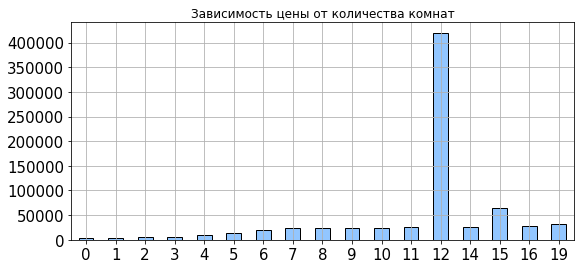

In [92]:
depend_price_bar(data, 'rooms')

А что по выбросам?

<AxesSubplot:>

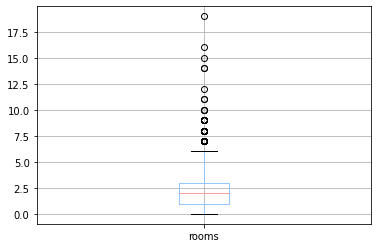

In [93]:
data.boxplot(column='rooms')

Исключаем выбросы, то есть берем значения до 6 комнат: 

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

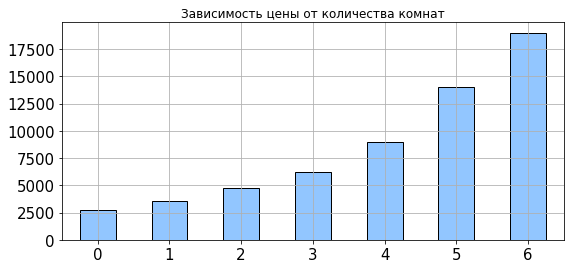

In [94]:
depend_price_bar(data.query('rooms <= 6'), 'rooms')

Чем больше комнат, тем выше цена -  и так до квартир с 7-ю комнатами. Далее - выбросы.

**Зависимость цены от этажа (по категориям):**

<AxesSubplot:title={'center':'Зависимость цены от этажа'}, xlabel='level'>

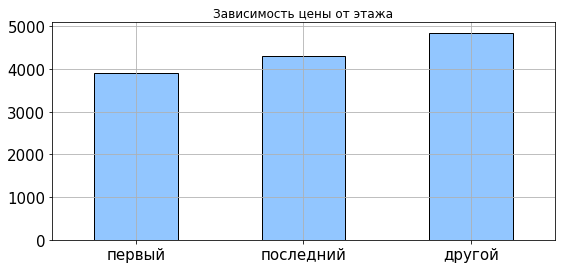

In [95]:
depend_price_bar(data, 'level')

Дополнительно построим "график-пирог":

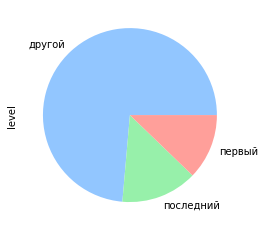

In [96]:
pie_level = data['level'].value_counts().plot(kind='pie')

С учётом того, что количество объявлений квартир не на первом и не на последнем этажах гораздо больше, цены между ними несильно отличаются. Квартиры на "других" этажах больше пользуются спросом, поэтому на них цена выше. На первом этаже - проходимость больше, слышимость соседей и заходящих гостей, а на последнем этаже часто бывают проблемы с крышей.. Ох, как сложно выбирать квартиру.. так ещё и в Питере...

**Зависимость цены от удалённости от центра по созданным ранее категориям (`fromcenter_category`):**

<AxesSubplot:title={'center':'Зависимость цены от удаленности от центра города'}, xlabel='fromcenter_category'>

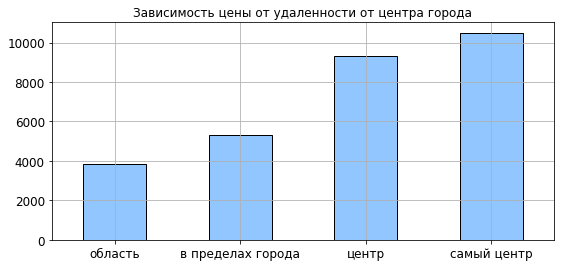

In [97]:
depend_price_bar(data, 'fromcenter_category')

Грустное реальное положение дел: чем дальше от центра, тем дешевле цены на квартиры.

**4.4. Исследуем зависимость цены от дня недели, месяца и года.**

Напишем свою функцию:

<AxesSubplot:title={'center':'Медиана цен по году'}, xlabel='year'>

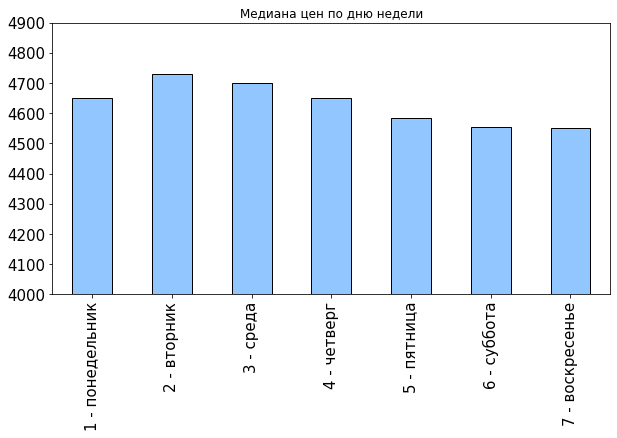

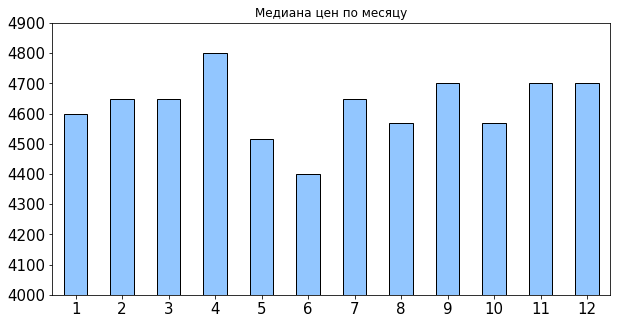

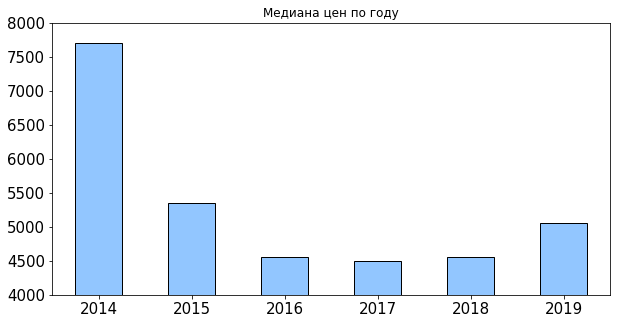

In [98]:
def dmy_price(df, ylims=None):
    dmy_to_plot = ['day', 'month', 'year']
    titles = ['Медиана цен по дню недели', 'Медиана цен по месяцу', 'Медиана цен по году']

    for i in range(len(dmy_to_plot)):
        df_to_plot = data.groupby(dmy_to_plot[i]).median()['last_price'].reset_index().sort_values(by=dmy_to_plot[i])
        if ylims is None:
            plot = df_to_plot.plot(x=dmy_to_plot[i], y="last_price", kind='bar', figsize=(10,5), ec='black',
                                   legend=False, title=titles[i], fontsize=15)
        else:
            plot = df_to_plot.plot(x=dmy_to_plot[i], y="last_price", kind='bar', figsize=(10,5), ec='black',
                               legend=False, title=titles[i], fontsize=15, ylim=ylims[i])
        ax2 = plt.gca()
        x_axis = ax2.xaxis
        x_axis.label.set_visible(False)
        if dmy_to_plot[i] != 'day':
            plt.xticks(rotation=0)
    return plot

dmy_price(data, ylims=[(4000, 4900), (4000, 4900), (4000, 8000)])

Промежуточные выводы:

1. Pависимость цены от дня недели публикации практически никак не зависит. Единственное, что можно сказать, так это то, что в среднем цены на квартиры, объявление о продажи которых опубликовано в будний день, чуть выше, чем цена на квартиры с объявлениями, опубликованными в выходные дни.
2. Зависимость цены от месяца публикации - апрель оказался самым дорогим: цены на квартиры, чьи объявления о продаже были опубликованы в апреле, выше, чем в другое время. Особенно выделяется медиана цен на квартиры по июньским объявлениям (6) - довольно низкие в сравнении с другими месяцами.
3. Зависимость цены от года публикации - 2014г. тут очень выделяется. Рассмотрим его чуть подробнее (по месяцам) и сделаем общий вывод про зависимость цены от года публикации.

<AxesSubplot:title={'center':'Медиана цен по месяцам'}, xlabel='month'>

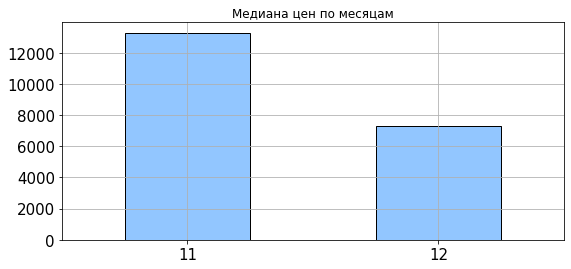

In [99]:
depend_price_bar(data.query('year == 2014'), 'month')

У нас представлены данные только о продажах в 11 (ноябрь) и 12 (декабрь) месяцах 2014 года (и позднее).
Предполагаю, что такие высокие цены были вызваны ажиотажем на рынке недвижимости, вызванным довольно скоротечным ослаблением рубля. По этой причине, спрос мог превышать предложение, учитывая то, какими активными участниками рынка стали те же граждане СНГ, у которых валюта пока не ослабла, отсюда и цены такие. 
К декабрю всё пошло на убыль, т.к.:
1) валюты граждан других близлежащих стран тоже начали падать;
2) в предновогодний месяц люди меньше задумываются о покупке чего-либо - экономят на праздник, предновогодний отпуск, может быть.
В 2019г. цена стала опять расти. Возможно, это связано с тем, что после 5 лет застоя рынок недвижимости проснулся, а также больше и больше граждан могут себе позволить приобрести недвижимость, так как медианная зарплата растет. Рост спроса порождает рост цен.

**Зависимость цены от площадей: общей, жилой, кухни**

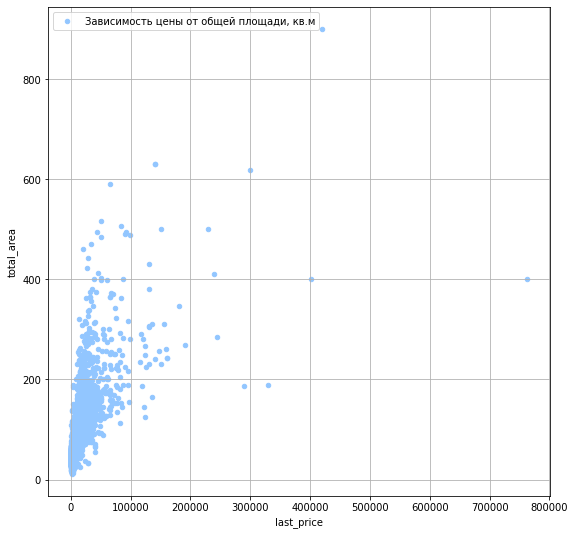

In [100]:
data.plot(x='last_price', y='total_area', kind='scatter', figsize=(9, 9), grid=True)
plt.legend(['Зависимость цены от общей площади, кв.м'])

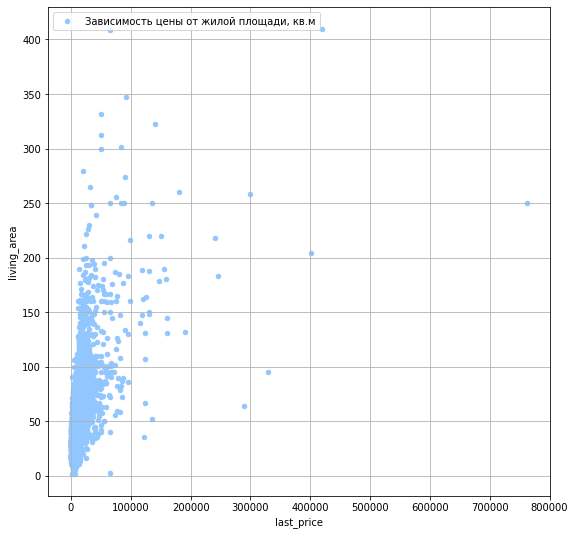

In [101]:
data.plot(x='last_price', y='living_area', kind='scatter', figsize=(9, 9), grid=True)
plt.legend(['Зависимость цены от жилой площади, кв.м'])

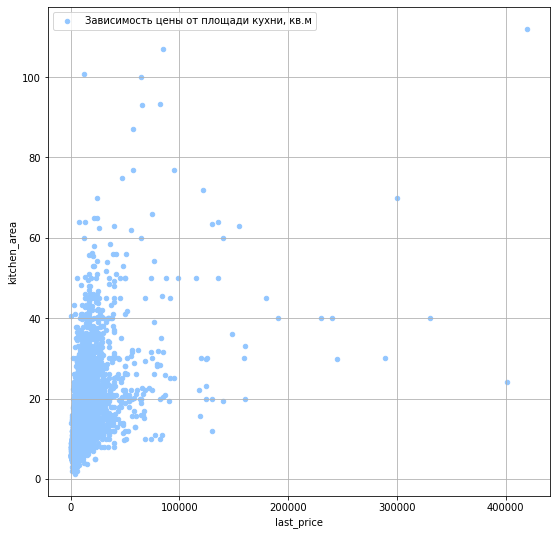

In [102]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', figsize=(9, 9), grid=True)
plt.legend(['Зависимость цены от площади кухни, кв.м'])

Ожидаемо: чем выше площади квартиры, тем выше стоимость

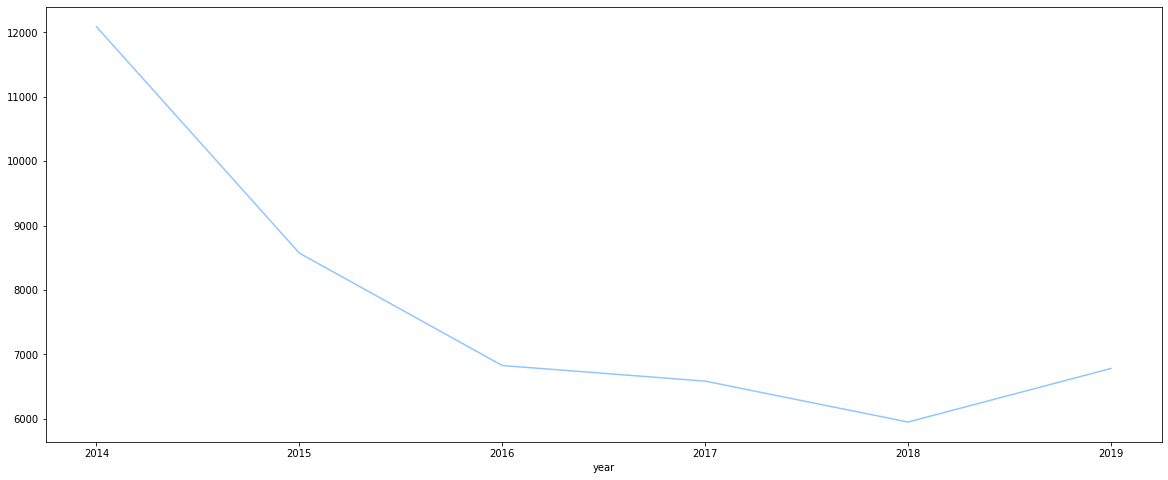

In [110]:
data.groupby('year')['last_price'].mean().plot(figsize = (20, 8));

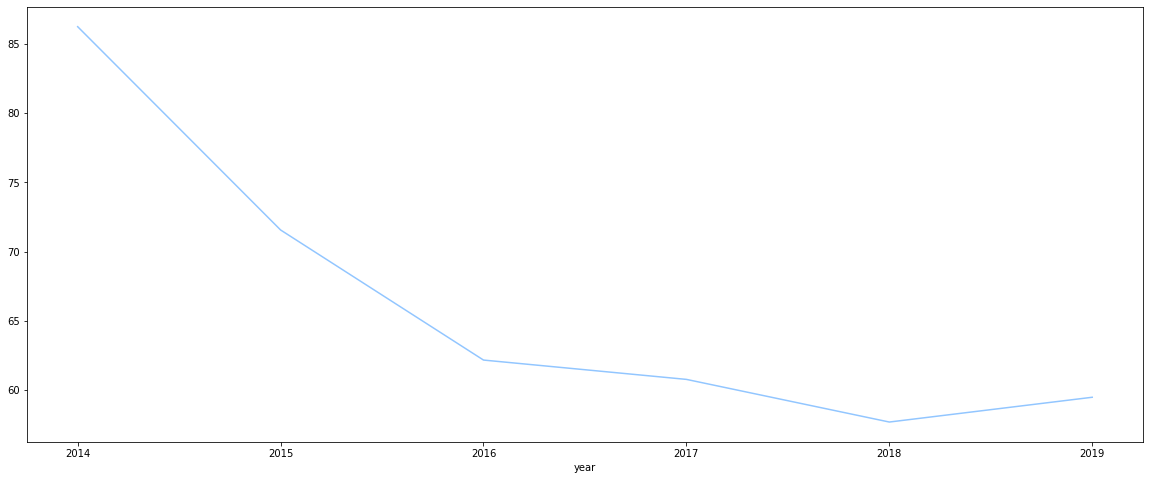

In [111]:
data.groupby('year')['total_area'].mean().plot(figsize = (20, 8));

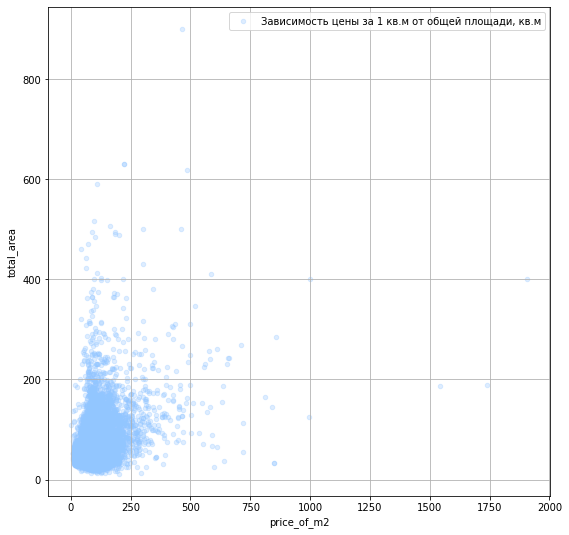

In [103]:
data.plot(x='price_of_m2', y='total_area', kind='scatter', alpha=0.3, figsize=(9, 9), grid=True)
plt.legend(['Зависимость цены за 1 кв.м от общей площади, кв.м'])

**4.5. Зависимость цены от места (населенного пункта)**

Выберем 10 населённых пунктов с наибольшим числом объявлений. Далее посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Данные берем из столбца `locality_name`.

In [104]:
top10 = data['locality_name'].value_counts().index.tolist()[:10]
mean10_metrics = [data[data['locality_name'] == city]['price_of_m2'].median() for city in top10]
mean10_prices = [data[data['locality_name'] == city]['last_price'].median() for city in top10]
frame = {'Город': top10, 'Медианная цена за кв.м., тыс. руб.': mean10_metrics, 'Медианная цена за квартиру, тыс. руб.': mean10_prices}
dataframe = pd.DataFrame(frame).sort_values(by='Медианная цена за кв.м., тыс. руб.', ascending=False)
dataframe

Город  Медианная цена за кв.м., тыс. руб.  \
0    Санкт-Петербург                            104.7610   
5             Пушкин                            100.0000   
2            Кудрово                             95.6750   
7  поселок Парголово                             91.6420   
1             Мурино                             86.1750   
3     поселок Шушары                             76.8760   
6            Колпино                             74.7235   
8            Гатчина                             67.7960   
4         Всеволожск                             65.7890   
9             Выборг                             58.1580   

   Медианная цена за квартиру, тыс. руб.  
0                                 5500.0  
5                                 5180.0  
2                                 3890.0  
7                                 4100.0  
1                                 3400.0  
3                                 3950.0  
6                                 3600.0  
8                                 3100.0  
4                                 3450.0  
9                                 2897.0

Мда, такие цены на квартиры нам ещё будут долго сниться в прекрасных снах...
Как и ожидалось, самые дорогие квартиры (что за всё жилье, что за 1 кв.м.) в Санкт-Петербурге и городе Пушкин. Чем дальше от города, тем дешевле. В Выборге средняя цена за квадратный метр в 2 раза ниже, чем в Санкт-Петербурге.

**4.6. Изучим предложения квартир.**

Для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (`locality_name`). Необходимо выяснить, какая часть входит в центр. После этого посчитаем среднюю цену для каждого километра. Построим график: он будет показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [105]:
flats_spb = data.query('locality_name == "Санкт-Петербург"')
flats_spb.loc[:, 'cityCenters_nearest_km'] = (flats_spb.loc[:, 'cityCenters_nearest']/1000).round(0)
flats_spb.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20       13000       108.0           2019-03-07      3   
2            10        5196        56.0           2015-08-20      2   
3             0       64900       159.0           2015-07-24      3   
4             2       10000       100.0           2018-06-19      2   
7             5        7915        71.6           2019-04-18      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.7          16.0         51.0      8          NaN  ...   
2             2.7           5.0         34.3      4          NaN  ...   
3             2.7          14.0          NaN      9          NaN  ...   
4             3.0          14.0         32.0     13          NaN  ...   
7             2.7          24.0          NaN     22          NaN  ...   

   days_exposition  fromcenter_category  price_of_m2  year month          day  \
0              NaN              область      120.370  2019     3  4 - четверг   
2            558.0    в пределах города       92.785  2015     8  4 - четверг   
3            424.0    в пределах города      408.176  2015     7  5 - пятница   
4            121.0    в пределах города      100.000  2018     6  2 - вторник   
7              NaN    в пределах города      110.544  2019     4  4 - четверг   

    level  living_area_part  kitchen_area_part  cityCenters_nearest_km  
0  другой              0.47               0.23                    16.0  
2  другой              0.61               0.15                    14.0  
3  другой               NaN                NaN                     7.0  
4  другой              0.32               0.41                     8.0  
7  другой               NaN               0.26                    12.0  

[5 rows x 31 columns]

Посмотрим на значения в `flats_spb`:

In [106]:
flats_spb.describe()

total_images     last_price    total_area         rooms  \
count  15746.000000   15746.000000  15746.000000  15746.000000   
mean      10.177061    8063.038549     64.765718      2.172425   
std        5.747853   13004.342167     40.403461      1.147958   
min        0.000000      12.000000     12.000000      0.000000   
25%        6.000000    4200.000000     42.000000      1.000000   
50%       10.000000    5500.000000     55.000000      2.000000   
75%       14.000000    8182.250000     74.700000      3.000000   
max       50.000000  763000.000000    900.000000     19.000000   

       ceiling_height  floors_total   living_area         floor  kitchen_area  \
count    15746.000000  15676.000000  14604.000000  15746.000000  14364.000000   
mean         2.750749     11.386323     36.971878      6.237648     11.154950   
std          0.270052      6.371950     24.695281      4.898414      6.541136   
min          1.000000      1.000000      2.000000      1.000000      1.300000   
25%          2.600000      5.000000     19.900000      3.000000      7.200000   
50%          2.700000      9.000000     31.300000      5.000000      9.900000   
75%          2.800000     16.000000     44.000000      8.000000     12.500000   
max          8.300000     52.000000    409.700000     33.000000    112.000000   

           balcony  ...  parks_nearest  ponds_around3000  ponds_nearest  \
count  15746.00000  ...   15736.000000      15685.000000   15735.000000   
mean       0.58129  ...     477.882435          0.771119     511.789005   
std        0.96672  ...     235.685653          0.925369     199.941931   
min        0.00000  ...       1.000000          0.000000      13.000000   
25%        0.00000  ...     460.000000          0.000000     498.500000   
50%        0.00000  ...     460.000000          1.000000     503.000000   
75%        1.00000  ...     460.000000          1.000000     510.000000   
max        5.00000  ...    3190.000000          3.000000    1337.000000   

       days_exposition   price_of_m2          year         month  \
count     13663.000000  15746.000000  15746.000000  15746.000000   
mean        183.004757    114.839738   2017.348914      6.420932   
std         224.739603     52.559423      1.059700      3.466155   
min           1.000000      0.111000   2014.000000      1.000000   
25%          42.000000     90.909000   2017.000000      3.000000   
50%          95.000000    104.761000   2017.000000      6.000000   
75%         232.000000    124.436000   2018.000000     10.000000   
max        1572.000000   1907.500000   2019.000000     12.000000   

       living_area_part  kitchen_area_part  cityCenters_nearest_km  
count      14604.000000       14364.000000            15746.000000  
mean           0.565857           0.185716               11.545599  
std            0.105565           0.073429                4.901492  
min            0.020000           0.030000                0.000000  
25%            0.500000           0.130000                8.000000  
50%            0.570000           0.170000               12.000000  
75%            0.640000           0.230000               15.000000  
max            1.000000           0.790000               29.000000  

[8 rows x 23 columns]

Построим график медианной цены в зависимости от удаленности от центра города:

In [112]:
#depend_price(flats_spb, 'cityCenters_nearest_km')

Ожидаемо, что в самом центре (в радиусе до 1 км) медианная цена на квартиру будет сильно отличаться стремится к 18 млн р. Если опираться на резкое падение цены по графику, то центр ограничен радиусом в 8 км, далее медианная цена идёт на стабильный спад. Однако, цены на 4-7км сравнимы с ценами на квартиры, расположенные в 2 км от центра, также, заметен спад на 3 км. Предполагаю, что это влияние на чуть более высокую, чем ожидалось, медианную цену оказывают определенные районы города.

**4.7. Изучим объявления о продаже квартир в центральной зоне города.**

In [113]:
flats_in_center = flats_spb.query('cityCenters_nearest <= 8000')

Узнаем количество строк датафрейма `flats_in_center` для того, чтобы указать выборку при прорисовке статистических графиков:

In [114]:
print('Выборка квартир в центральной зоне Санкт-Петербурга -', flats_in_center.shape[0], 'квартир')

Выборка квартир в центральной зоне Санкт-Петербурга - 3789 квартир


Сначала построим такие же гистограммы распределения для площади, цены, числа комнат и круговую диаграмму для высоты потолков (используем те же лимиты по оси x, которые использовали при построении данных для всего датафрейма):

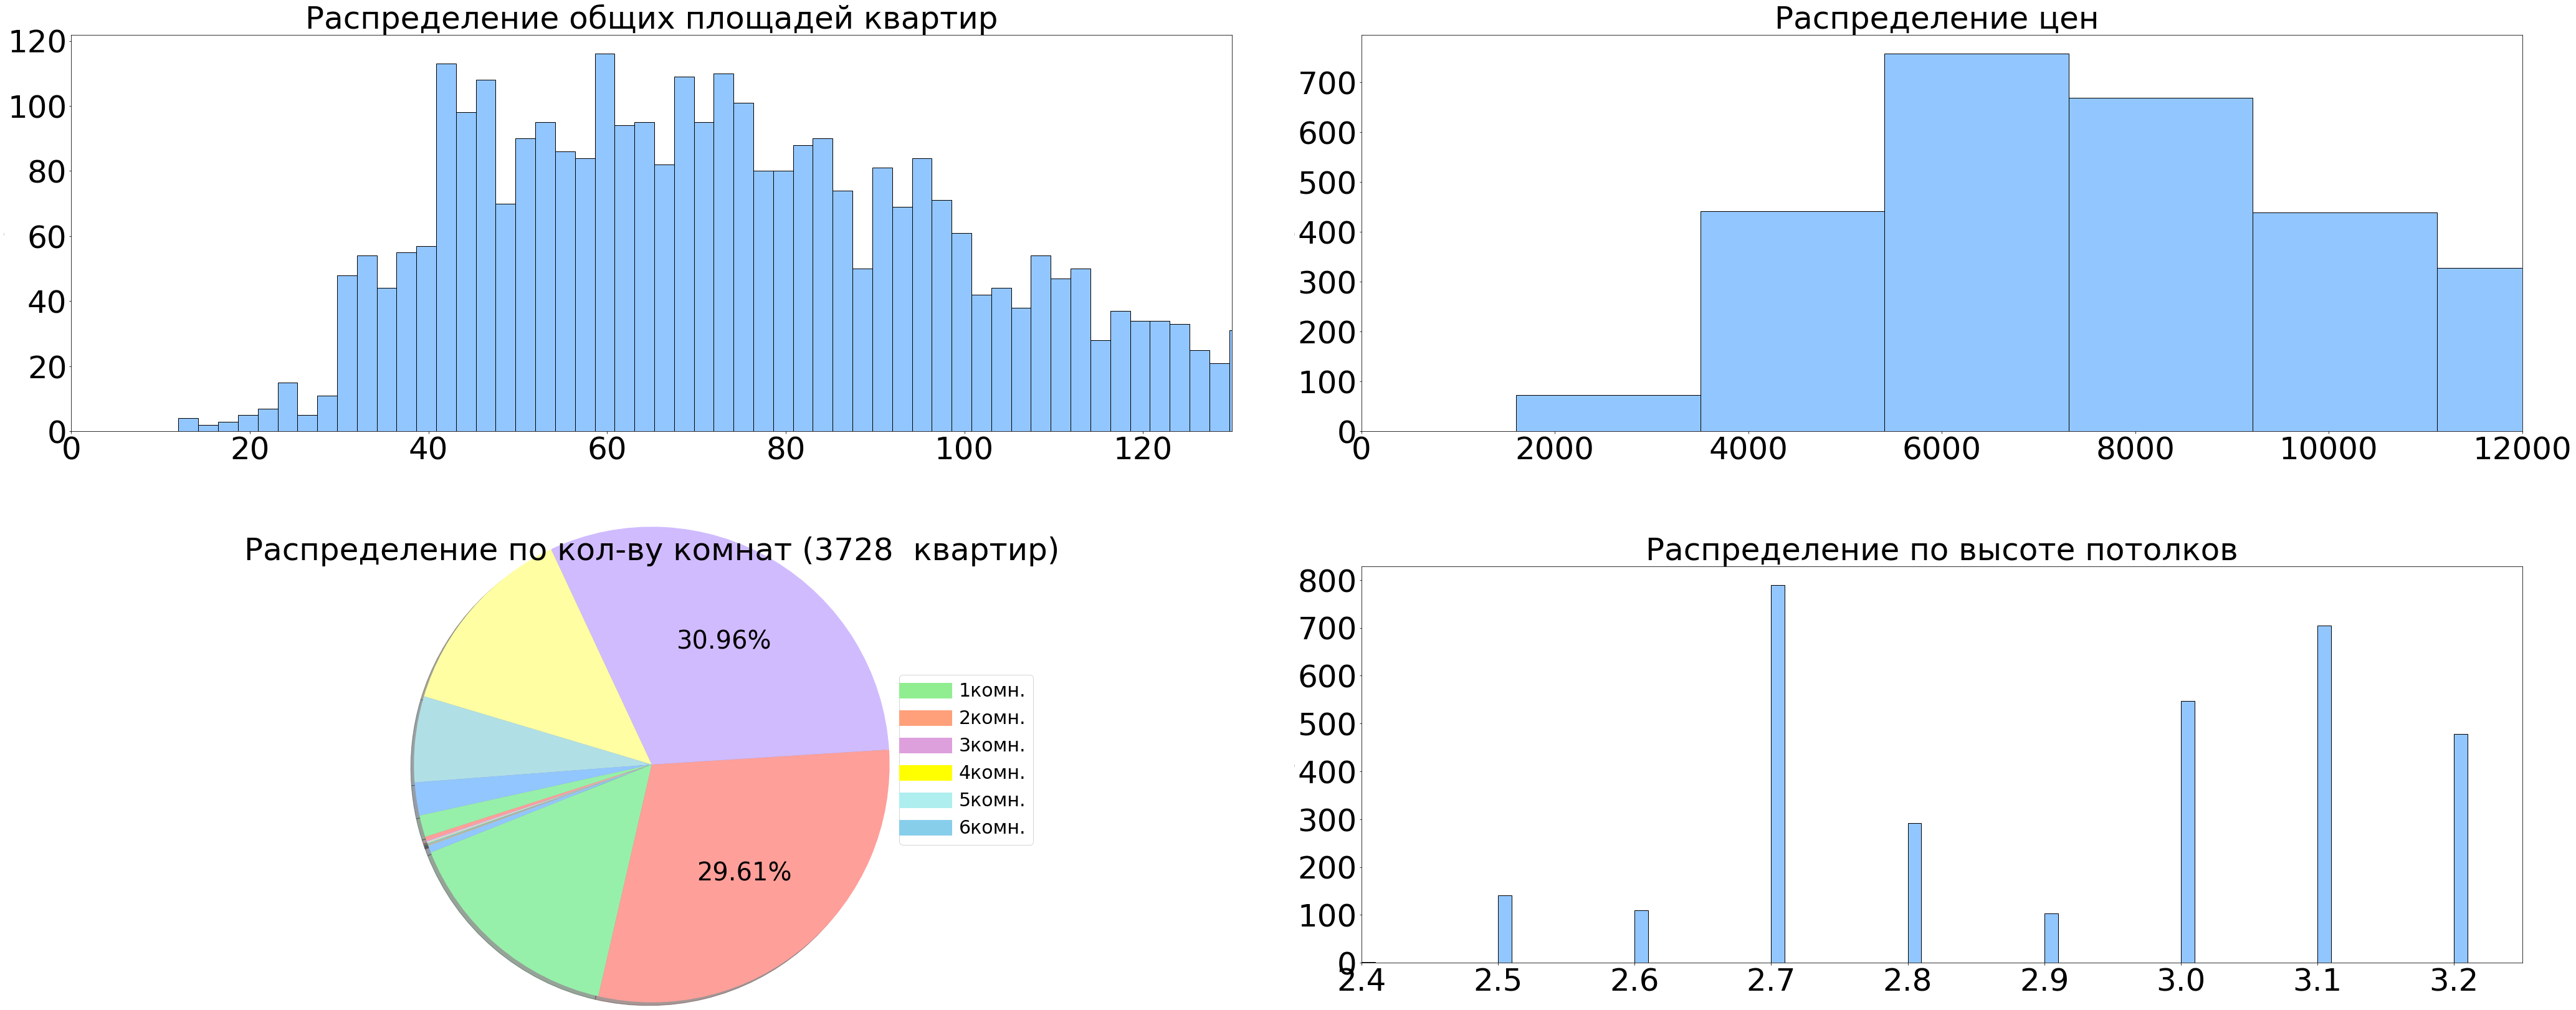

In [115]:
flats_in_center_rooms_pivot = flats_in_center.pivot_table(index='rooms', values='last_price', aggfunc='count')

df_list = [flats_in_center['total_area'], flats_in_center['last_price'], flats_in_center['rooms'], flats_in_center['ceiling_height']]
df_titles_list = ['Распределение общих площадей квартир', 'Распределение цен ', 
                  'Распределение по кол-ву комнат (3728  квартир)', 'Распределение по высоте потолков']
xlims_list = [130, 12000, 12, 3.25]
nrow = 2
ncol = 2

def func_pct(pct, data, sum_of_all):
    value = float(pct/100.*sum_of_all)
    if value > 5000:
        return "{:.2f}%\n({:.0f} шт.)".format(pct, value)
    elif value > 1000:
        return "{:.2f}%".format(pct)
    else:
        return ''

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(60,25))
count = 0
for r in range(nrow):
    for c in range(ncol):
        if df_titles_list[count] == 'Распределение по кол-ву комнат (3728  квартир)':
            sum_filt_flats_in_center = flats_in_center_rooms_pivot.sum()
            data_for_pct = flats_in_center_rooms_pivot
            ax = flats_in_center_rooms_pivot.plot(kind='pie', y="last_price", labels=None,
                                                            autopct = lambda pct: func_pct(pct,data_for_pct,sum_filt_flats_in_center),
                                                            radius=1.5, shadow=True, startangle=200, fontsize=40,
                                                            title=df_titles_list[count], legend=True, 
                                                            pctdistance=0.6, labeldistance=0.5, ax=axes[r,c])
            custom_lines = [Line2D([0], [0], color='lightgreen', lw=25),
                            Line2D([0], [0], color='lightsalmon', lw=25),
                            Line2D([0], [0], color='plum', lw=25),
                            Line2D([0], [0], color='yellow', lw=25),
                            Line2D([0], [0], color='paleturquoise', lw=25),
                            Line2D([0], [0], color='skyblue', lw=25)]
            ax.title.set_size(50)
            ax.title.set_position([0.5, 1.5])
            ax.set_ylabel('')
            ax.legend(custom_lines, ['1комн.', '2комн.', '3комн.', '4комн.', '5комн.', '6комн.'], 
                      bbox_to_anchor=(1.1,0.75), prop={'size':30})
            plt.tight_layout(pad=10)
        else:
            ax = df_list[count].plot(kind='hist', bins=400, fontsize=50, title=df_titles_list[count], 
                                     ec='black', ax=axes[r,c])
            if count == 3:
                ax.set_xlim(2.4, xlims_list[count])
                ax.title.set_position([0.5, 1.15])
            else:
                ax.set_xlim(0, xlims_list[count])
            ax.title.set_size(50)
            ax.yaxis.label.set_size(0)
        count += 1
        

1. Гистограмма "Распределение площадей": Большая часть квартир имеет метраж от 50 до 100 кв.м., пиков много, основные - 60, 70 и 90 кв.м.
2. Гистограмма "Распределение цен": цена на квартиры лежит, в основном, в промежутке от 4,5 до 12 млн р. Большая часть квартир продается за цену в промежутке между 7,5 и 10 млн р.
3. Круговая диаграмма "Распределение по количеству комнат": Больше всего 2- и 3комнатных квартир, чуть меньше - 4хкомнатных. 
4. Гистограмма "Распределение по высоте потолков": квартиры, в большинстве своем, имеют потолки 3,25м. Ещё пару квартир имеют высоту потолков от 2,7 до 3,5м. Ниже, выше - редкость.

**4.8 Исследуем рынок продаж в СПБ+ЛО, СПБ, Центре СПБ**

Интересно, как влияют различные факторы на рынок продаж недвижимости по всему Питеру, Центру Питера и всей Ленинградской области в целом. Построим необходимые графики для Санкт-Петербурга + Лен. области, отдельно для города Санкт-Петербурга и отдельно для его центральной зоны, включая Санкт-Петербург, на одних осях.

Гистограмма времени продажи квартир в центре СПб, в СПб и в СПб+ЛО:

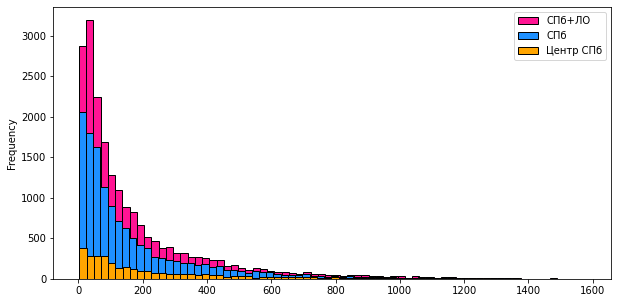

In [116]:
ax = plt.gca()

data['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='deeppink')
flats_spb['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='dodgerblue')
flats_in_center['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='orange')
plt.legend(['СПб+ЛО', 'СПб', 'Центр СПб'])

Ограничимся 180 днями(полгода):

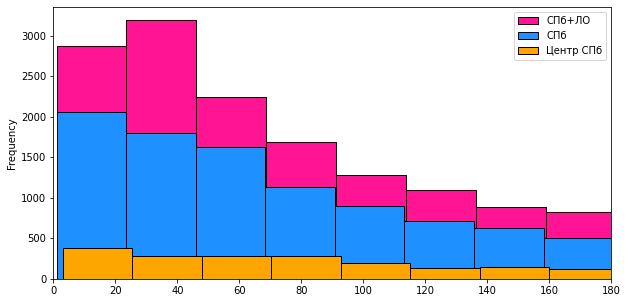

In [117]:
ax = plt.gca()

data['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='deeppink', xlim=(0, 180))
flats_spb['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='dodgerblue', xlim=(0, 180))
flats_in_center['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='orange', xlim=(0, 180))
plt.legend(['СПб+ЛО', 'СПб', 'Центр СПб'])

Обычно квартиры продаются в течение первых 25 дней. Это касается как всей территории СПб + ЛО в среднем, так и центра СПб. По самому СПб ситуация немного иная - большая часть квартир продается в срок от 25 до 50 дней. Получается, что на общую картину (СПб+ЛО) влияют продажи в области - в области они сильно дешевле. Предположительно, именно поэтому переезжающие на ПМЖ в Санкт-Петербург люди охотятся за этими дешевыми квартирами, несмотря на их удаленость от города. Спрос на квартиры в центре велик, однако, в среднем, квартиры в центре могут продаваться от 25 до 95 дней.

In [118]:
def depend_price_multiple(list_of_dfs, column):
    dfs_dict = {'СПб+ЛО': data, 'СПб': flats_spb, 'Центр СПб': flats_in_center,
                'СПб+ЛО фильтр': data.query('rooms <= 6'), 
                'СПб фильтр': flats_spb.query('rooms <= 6'),
                'Центр СПб фильтр': flats_in_center.query('rooms <= 6')}
    title_dict = {'rooms': 'Зависимость цены от количества комнат', 'level': 'Зависимость цены от этажа',
                  'fromcenter_category': 'Зависимость цены от удаленности от центра города',
                  'day':'Медиана цен по дням недели', 'month': 'Медиана цен по месяцам',
                  'year': 'Медиана цен по годам', 
                  'cityCenters_nearest_km': 'Зависимость цены от удаленности от центра города'}
    
    plt.style.use('seaborn-pastel')
    list_of_colors = ['deeppink', 'dodgerblue', 'orange']
    legend_list = []
    
    if column == 'level' or column == 'fromcenter_category':
        sort_key = 'last_price'
    else:
        sort_key = column
    if column == 'fromcenter_category':
        fontsize = 12
    else:
        fontsize = 15
    
    plt.figure(figsize=(12,5)) 
    ax = plt.gca()
    
    for i in range(len(list_of_dfs)):
        current_df = dfs_dict[list_of_dfs[i]]
        current_df_filtered = current_df.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
        plot = current_df_filtered.plot(x=column, y="last_price", kind='bar', ec='black', 
                                        title=title_dict[column], legend=None, color=list_of_colors[i],
                                        fontsize=fontsize, ax=ax, width=0.1, position=i)
        legend_list.append(list_of_dfs[i])
    x_axis = ax.xaxis
    x_axis.label.set_visible(False)
    ax.legend(legend_list)
    if column not in ['cityCenters_nearest_km', 'day']:
        plt.xticks(rotation=0)
    return plot

Исследуем зависимость цены от количества комнат, этажа, дня размещения объявления.

Посмотрим зависимость цены от количества комнат по всем данным, СПб и центру СПб с квартирами до 6 комнат:

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

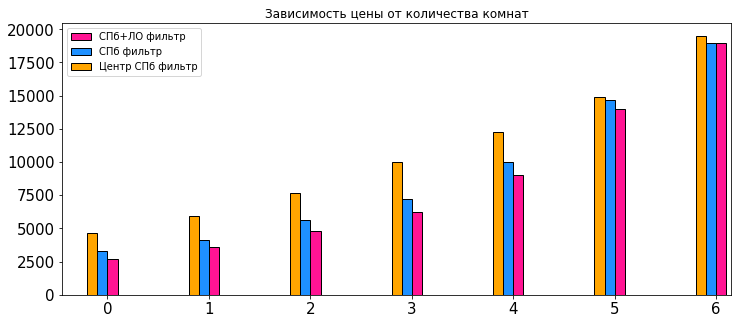

In [119]:
depend_price_multiple(['СПб+ЛО фильтр', 'СПб фильтр', 'Центр СПб фильтр'], 'rooms')

Ожидаемо одинаковая картина. С ростом количества комнат в квартире растёт и цена на неё. Цены объективно выше всего в центре СПб, заметно ниже в пределах СПб, а в области дешевле, чем в городе.

Смотрим зависимость цены от этажа по всем данным, СПб и центру СПб:

<AxesSubplot:title={'center':'Зависимость цены от этажа'}, xlabel='level'>

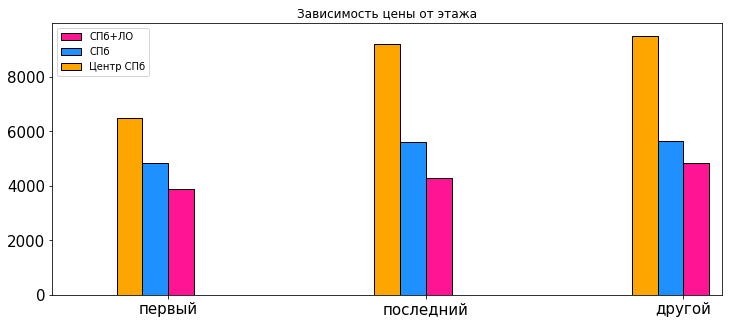

In [120]:
depend_price_multiple(['СПб+ЛО', 'СПб', 'Центр СПб'], 'level')

То же самое: ожидаемая картина.

Смотрим зависимость цены от даты размещения объяления по всем данным, СПб и центру СПб.
Для этого необходимо изменить уже имеющуюся функцию dmy_price - создадим на её основе новую, чтобы получать графики сразу по всему датафрейму, по СПб и по его центру:

In [121]:
def dmy_price_multiple(list_of_dfs, ylims=None):
    dfs_dict = {'СПб+ЛО': data, 'СПб': flats_spb, 'Центр СПб': flats_in_center}
    dmy_to_plot = ['day', 'month', 'year']
    titles = ['Медиана цен по дню недели', 'Медиана цен по месяцу', 'Медиана цен по году']
    
    plt.style.use('seaborn-pastel')
    list_of_colors = ['deeppink', 'dodgerblue', 'orange']
    legend_list = []
    
    for i in range(len(dmy_to_plot)):
        ax = plt.gca()
        plt.figure(figsize=(30,5))
        for df_number in range(len(list_of_dfs)):
            current_df = dfs_dict[list_of_dfs[df_number]]
            current_df_filtered = current_df.groupby(dmy_to_plot[i]).median()['last_price'].reset_index().sort_values(by=dmy_to_plot[i])
            if ylims is None:
                plot = current_df_filtered.plot(x=dmy_to_plot[i], y="last_price", kind='bar', figsize=(15,5), ec='black',
                                               legend=False, title=titles[i], fontsize=15, color=list_of_colors[df_number],
                                               ax=ax, width=0.1, position=df_number)
            else:
                plot = current_df_filtered.plot(x=dmy_to_plot[i], y="last_price", kind='bar', figsize=(15,5), ec='black',
                                               legend=False, title=titles[i], fontsize=15, color=list_of_colors[df_number],
                                               ax=ax, width=0.1, position=df_number, ylim=ylims[i])
            legend_list.append(list_of_dfs[df_number])
        x_axis = ax.xaxis
        x_axis.label.set_visible(False)
        ax.legend(legend_list, loc=1, framealpha=0.2)
        
    return plot

<AxesSubplot:title={'center':'Медиана цен по году'}, xlabel='year'>

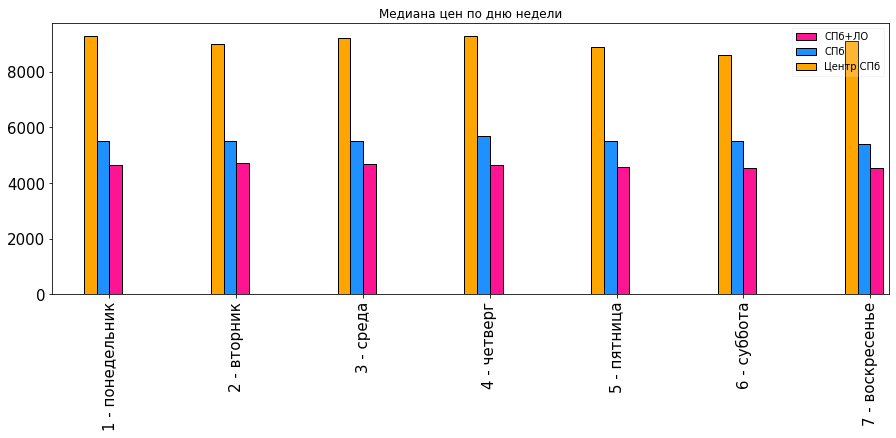

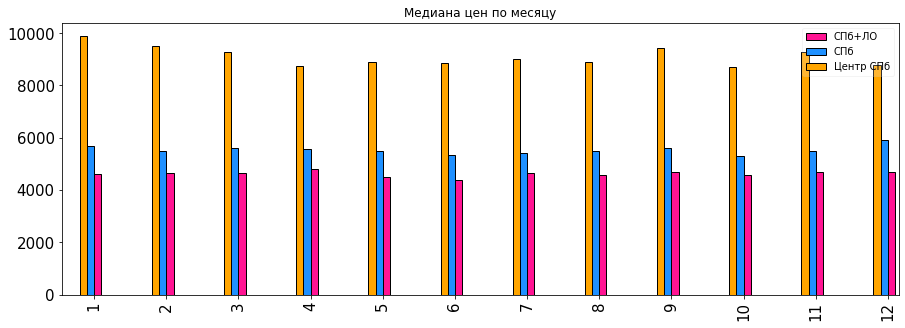

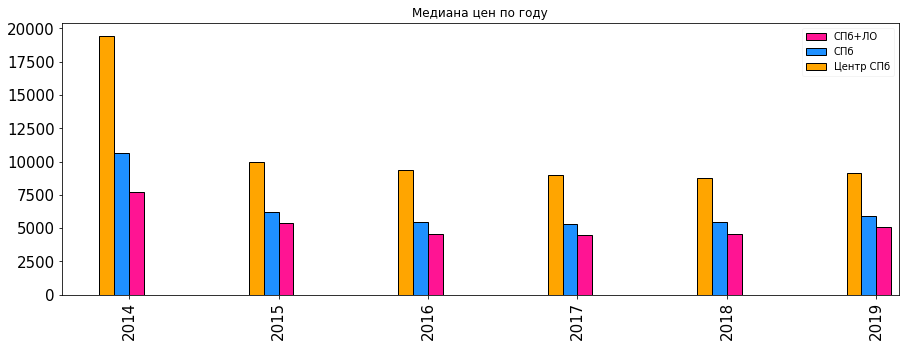

<Figure size 2160x360 with 0 Axes>

In [122]:
dmy_price_multiple(['СПб+ЛО', 'СПб', 'Центр СПб'])

**По ценам по дню недели:**

в среднем, квартиры, по которым объявления о продаже появились на рынке в будний день, продаются по незначительно более высокой цене, чем квартиры, объявления о продаже которых были опубликованы в выходные дни. Такое утверждение справедливо для квартир в центре СПб, в целом в СПб и для квартир по всему СПб + ЛО.

**По ценам по месяцу:**

Квартиры в СПб+ЛО и в пределах СПб, выставляемые на продажу летом, чуть дешевле остальных. Свою лепту вносят квартиры из ЛО, которые в 5 и 6 месяцах "прогибают" график. Видимо, спрос летом падает, т.к. многие в это время отдыхают, а люди не готовы продавать квартиры по полгода, поэтому снижают цены. Также для всех квартир справедливо утверждение, что они продаются дешевле по объявлению, опубликованному в октябре.

**По ценам по году:**

Для всех типов квартир 2014 стал последним годом высоких цен. Как кризис в РФ и СНГ, так и цены поползли вниз, а точнее рухнули. В 2019г. общая тенденция такова, что цены на квартиры немного выросли по сравнению с периодом 2015-2018гг., сказывается то, что спрос становится всё больше и больше, так как граждане пережили кризис только к этому времени и смогли себе позволить покупку квартиры. 

**4.9. Исследуем общую картину.**

 Посмотрим, как влияют определенные параметры квартиры на её цену.

<AxesSubplot:>

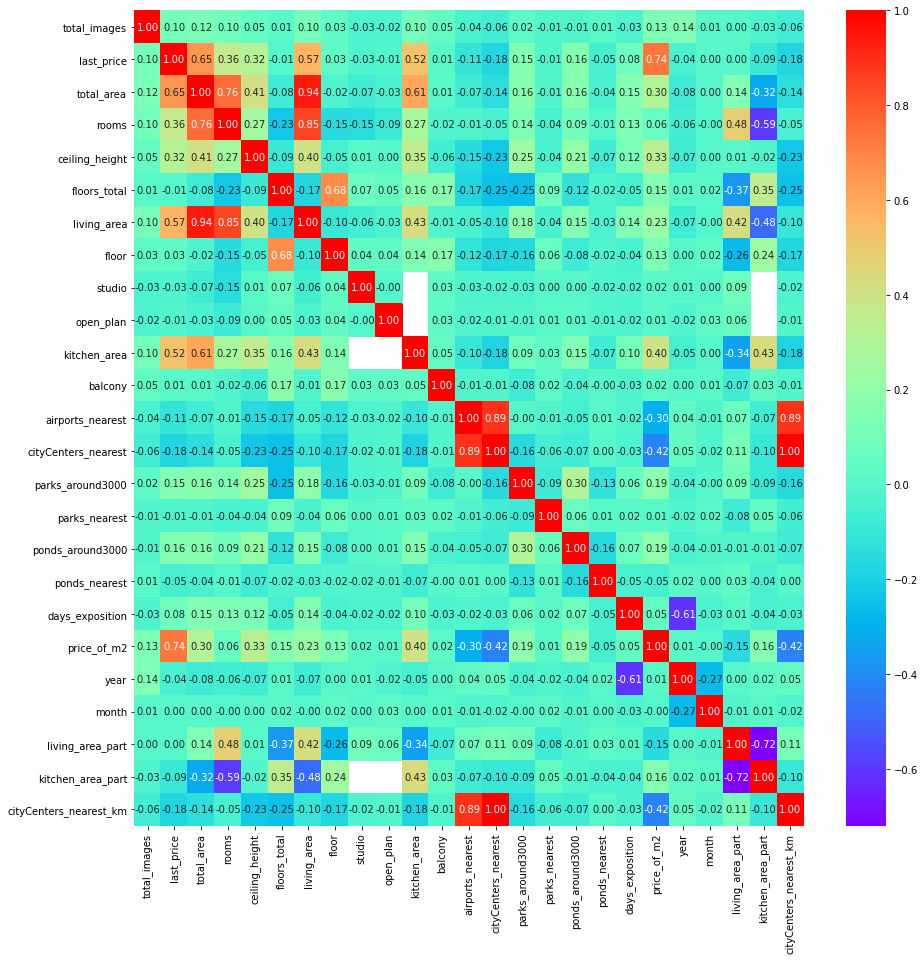

In [123]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="rainbow", fmt='.2f')

Выделим только столбец `last_price`, чтоб детальней рассмотреть влияние различных параметров именно на цену:

<AxesSubplot:>

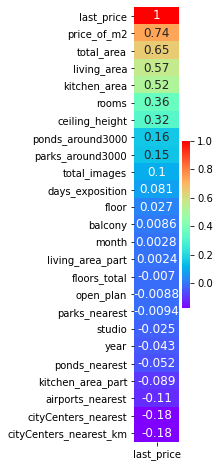

In [124]:
plt.figure(figsize=(1,8))
sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="rainbow", 
            annot=True, annot_kws={'size':12})

Cильнее всего цена на квартиру зависит от цены за квадратный метр, от общей площади квартиры (чем больше площадь, тем выше цена), от площади жилой площади и площади кухни, а также от количества комнат и высоты потолка. Небольшое влияние оказывает присутствие парков/водоемов рядом.
Также, есть небольшое влияние от удаленности от центра. Чем дальше от центра, тем ниже цена. 
Наименьшее влияние оказывает удаленность от водоёма.
Многие из этих параметров оказывают довольно слабое влияние, но если попробовать их объединить в одну группу, то, наверняка, можно будет построить хорошую модель прогноза.

### Общий вывод

Во время исследования были изучены данные архива объявлений о продаже квартир в Санкт-Петербурге и близлежащих городов из сервиса Яндекс.Недвижимость. В данных были исправлены аномалии, заполнены пропуски в столбцах, которые необходимы в исследовании. В исследовании рассматривалось, как отдельные характеристики квартиры и объявления о продаже могут влиять на цену квартиры. Были сравнены разные выборки данных рынка продаж недвижимости (В пределах центра города, в пределах основного города и всей Ленинградской области). Наибольшее влияние оказывают следующие характеристики: цена за квадратный метр, общая площадь, жилая площадь, площадь кухни, количество комнат, высота потолка. Наименьшее влияние оказывает удаленность от водоёма.
Из ТОП 10 населенных пунктов с наибольшим числом объявлений о продаже в Питере и Пушкине наиболее высокая цена за квадратный метр, а наиболее низкая - в Выборге.

Были зафиксированы следующие наблюдения: 
1. Чем больше площадь квартиры и цена за квадратный метр, выше доля жилой площади/площадь кухни, больше комнат, тем выше цена.
2. На первом этаже квартира дешевле, чем на остальных; на последнем дороже, чем на первом, но дешевле чем на остальных.
3. Чем ближе к центру, тем дороже квартира. В самом центре (< 1 км до центра) квартиры стоят на порядок дороже, чем на более удаленных.
4. Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные.
5. Квартиры, размещенные к продаже в летние месяцы и в октябре, в среднем дешевле, чем размещенные в любые другие месяца. В начале и в конце года цены стабильные и высокие (на тот момент времени, не сейчас, конечно же).
6. Квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - рынок продажи недвижимости рухнул, последствия кризиса. 2019г. - рецессия экономики - цены пошли вверх.
